# Creator suggestion for influencer sponsorship

## Part 2: Data Cleaning, Exploration of Data (EDA) and Feature Engineering on numerical columns
---

### Content Workflow:
- [Problem Statement](#Problem-Statement:)
- [Background](#Background)
- [List of Clientele and Profile](#List-of-Clientele-and-Profile)
- [Instatiate libraries](#Instatiate-libraries)
- [Saving and loading of datasets](#Saving-and-loading-of-datasets)
- [Import all Youtube creator dataset](#Import-all-Youtube-creator-dataset)
- [Initial EDA on the content creator channel data](#Initial-EDA-on-the-content-creator-channel-data)
- [Analysing youtube videos from content creators](#Analysing-youtube-videos-from-content-creators) 
- [Preliminart EDA on videos data](#Preliminart-EDA-on-videos-data)
- [Data Cleaning of output columns](#Data-Cleaning-of-output-columns)
- [Feature Engineering on Numerical Column on data](#Feature-Engineering-on-Numerical-Column-on-data)
- [Define the target variable](#Define-the-target-variable)
- [EDA post feature engineering](#EDA-post-feature-engineering)
- [Selecting numerical features for the modelling](#Selecting-numerical-features-for-the-modelling)

## Problem Statement:

Employed by a marketing agency specializing on influencer marketing, we are tasked to perform market research on the social media platform. Using YouTube data, a list of content creators was identified and analysed for recommendations to influence company's sponsorship decisions. 
1. The client aims to reach a greater audience with the use of influencer marketing 
2. Creator should reflect the client's branding to boost overall brand recognition

## Background

The marketshare of influencer marketing has experienced an increase throughout the years was further heightened during the covid-19 pandemic, over 54% of consumers in US and UK consumed more shows on streaming services content during the pandemic in a survey conducted by [Global Web Index](https://www.smartinsights.com/social-media-marketing/social-media-strategy/new-global-social-media-research/). To capitalize on this market, analyizing on the data from social media sites would aid in optimize exixting options to make data-driven decisions. Consequentialy an increase from 

From YouTube, the video analytics can be determined by video indicators for key engagement indicators such as view count, like count, comment count from the video. Additional information can be obtained from categorising topics on text data such as the title of the videos to match so that it is in line with the company brand. This would assist in projecting a greater positive impact on the company brand which can translate to a greater number of product sales. Creators can be determined from the number of videos that meets the criteria which is indicative of a [successful video](https://tubularlabs.com/blog/3-metrics-youtube-success/#:~:text=The%20best%20ratio%20for%20measuring,4000%20views%20would%20be%2020). 

### ***Ratios defining a successful video/channel*** ###
**1. Comments to Views on a video** 
    
The best indicator for a successful video is 0.5% between the comments to view on an uploaded video. An approximate of 5 comments is expected to a video with 1000 views. This ratio is a good indicator of the engagment of a particular video. 
    
**2. Like to Video view ratio**

An indicator for a popular video is 4% between the likes to view on an uploaded video. A benchmark of a good video is a video with 4 likes to every 100 view on an uploaded video. This ratio is a good indicator of the popularity of a video. 

**3. View to Channel Subscribers**

As the influencer scene is a very competitive market, the growth of a channel is a crutial indicator. The community built by the creator is a crutial part of the outreach of the influencer is a negotiating power of the company. An indicator of a channel growth has a 14% average ratio of view to subscribers.

## List of Clientele and Profile
---

The three company targeted in this trial are **Brilliant, Nord VPN** and **The Washi Tape Shop**. A brief decription of the 3 companies are listed in the following:

### Company Profile ###
1. [Brilliant](https://brilliant.org/) 

Brilliant is an online interactive classroom focus on STEM related subjects. The company aims to inspire and develop people in realising their STEM goals. They enable great teachers to illuminate the soul of math, science, and engineering through digestable content. 

**Key Words:** Education, STEM, learning, teaching

2. [Nord VPN](https://nordvpn.com/)

NordVPN is a VPN service and the flagship product of the cybersecurity company Nord Security. We value people’s freedom of choice beyond anything else, so we strive to offer access to free and safe internet for our users. Through hard work, dedication, and technological innovation we’ve created the fastest VPN in the world with state-of-the-art features. 

**Key Words:** Lifestyle, cybersecurity, VPN 

3. [The Washi Tape Shop](https://thewashitapeshop.com/)

The company aims to build a community of artists, journalers, and crafters, we've designed and created an array original washi tapes and stationery for you to enjoy. Committed to quality of products and dedication to customers, The Washi Tape Shop creates the most vibrant gilded washi tapes with premium washi paper and eco-friendly printing technology around the clock to ensure end users has the best shopping experience.  

**Key Words:** Stationary, lifestyle, washi

## Instatiate libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import datetime as dt
import emoji
import demoji
import regex as re

# Import progress bar
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

# Removal of stopwords
from nltk.tokenize import RegexpTokenizer
import emoji
import demoji
import numpy as np
import regex as re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Huggingface model
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# Import tqdm
from tqdm import tqdm

# Expand display of the dataframe
pd.options.display.max_colwidth = 500

## Saving and loading of datasets

In [82]:
### Load Saved datasets
#df = pd.read_csv('./output/eda_df_token.csv')
#yt_df1 = pd.read_csv('./output/eda_yt_df1.csv')
#ch_df = pd.read_csv('./output/eda_ch_info.csv')

# Import all Youtube creator dataset

In [83]:
# Section commented as load dataset is used
ch1_df = pd.read_csv('./output/channel_data.csv')
ch2_df = pd.read_csv('./output/channel_data_2.csv')
ch3_df = pd.read_csv('./output/channel_data_3.csv')

In [84]:
frames = [ch1_df, ch2_df, ch3_df]

ch_df = pd.concat(frames)
print(ch_df.shape)
ch_df = ch_df.drop(columns='Unnamed: 0')
#ch_df.reset_index()
ch_df.head()
#ch_df = ch_df.drop(columns='index')

(62, 7)


,Channel_name,Description,Subscribers,Views,Total_videos,Playlist_id
0,Seattle Data Guy,"Welcome to my channel.\n\nI make videos on data science, data engineering and consulting. \n\nFollow me on:\n\nLinkedin: https://www.linkedin.com/company/18129251/\nFacebook: https://www.facebook.com/SeattleDataGuy\nTwitter: https://twitter.com/SeattleDataGuy\n\n",35100,1630138,132,UUmLGJ3VYBcfRaWbP6JLJcpA
1,Alex The Analyst,"My name is Alex Freberg and on this channel I will be going over everything you need to know to become a Data Analyst. If you are wanting to make a career change or learn the skills needed to become a Data Analyst, be sure to subscribe to stay up to date on all my latest content.\n\nYou can find me on LinkedIn at:\nhttps://www.linkedin.com/in/alex-freberg/\n\nAlexTheAnalyst.com\nhttps://www.alextheanalyst.com/\n\nDiscord Channel:\nhttps://discord.gg/rxZUjNvRzR\n\n1 on 1 Coaching/Support the ...",251000,9983597,153,UU7cs8q-gJRlGwj4A8OmCmXg
2,Luke Barousse,"What's up, Data Nerds! I'm Luke, a data analyst, and I make videos about tech and skills for data science.\n\nIf you have a question about becoming a data analyst, drop a comment in any video. No need to email, as I answer all comments!\n\n\n",200000,9609930,77,UULLw7jmFsvfIVaUFsLs8mlQ
3,Internet Made Coder,"On this channel, my aim is to give you the tools, strategies and methods to learn to code effectively - according to science! In addition, I document my life as a self-taught software engineer.\n\nFor collaborations: tuomas@internetmadecoder.com\n\nFor sponsorships: internet_made_coder@intheblackmedia.com\n",90000,3036569,40,UUcJQ96WlEhJ0Ve0SLmU310Q
4,Matt D'Avella,"Hi there 👋 If you're new to my video's my name is Matt D'Avella. I'm a documentary filmmaker, entrepreneur and YouTuber. I've made a couple documentaries for Netflix. I also teach courses on everything from filmmaking to habit change. If you like to nerd out about self-development as much as I do, you can subscribe for weekly videos.\n\nIf you like my videos you might like my courses where I go even deeper into topics like self-development, creativity & filmmaking: http://slowgrowth.com\n \n...",3370000,250569870,392,UUJ24N4O0bP7LGLBDvye7oCA


## Initial EDA on the content creator channel data
---

From the above channel data, the channels identified has been concated to create an expansive dataframe with 62 unique channels.

The following actions are taken in the following section:

1. Feature Engineer on the growth of the channel on all channels

2. The top 30 channels is plotted on the attributes (Subscribers, Views and Total_videos)

In [85]:
ch_df['Growth'] = (ch_df['Views']/ch_df['Total_videos'])/ch_df['Subscribers']*100 

In [86]:
ch_df['Growth_target'] = ch_df['Growth']>=14
ch_df['Growth_target'] = ch_df['Growth_target'].astype(int)

In [87]:
ch_df.describe()

,Subscribers,Views,Total_videos,Growth,Growth_target
count,6.200000e+01,6.200000e+01,62.000000,62.000000,62.000000
mean,8.180958e+05,7.181034e+07,253.580645,91.582379,0.887097
std,1.700437e+06,2.265110e+08,291.909628,175.344838,0.319058
min,1.800000e+02,1.497400e+04,7.000000,4.171822,0.000000
25%,1.560000e+05,7.513269e+06,65.750000,18.487843,1.000000
50%,2.785000e+05,1.493551e+07,162.000000,35.735805,1.000000
75%,7.042500e+05,4.710860e+07,338.750000,77.496182,1.000000
max,1.230000e+07,1.742450e+09,1443.000000,1188.412698,1.000000


In [88]:
a = ch_df.loc[ch_df['Growth']<14]['Channel_name']
print(f'There are {a.count()} channels who does not meet growth indicators.\n{a}')

There are 7 channels who does not meet growth indicators.
9            Ken Jee
2     Hussein Nasser
6       John Hammond
18      David Bombal
8         Krish Naik
11    Data Professor
12        Lavendaire
Name: Channel_name, dtype: object


In [89]:
def get_graph(data, Title, x_axis, y_axis, num):
    to_df = data.sort_values(y_axis,ascending = False)[:num] # num needs to be smaller than 31
    df = pd.DataFrame(to_df)
    sns.set(rc={'figure.figsize':(40,15)})
    ax = sns.barplot(x=x_axis, y=y_axis, data=df)
    ax.set_xlabel(x_axis, fontsize=16);
    ax.set_ylabel(y_axis, fontsize=16);
    ax.set_title(Title, fontsize=20)
    ax.set_xticklabels(labels=df[x_axis], rotation=90, fontsize=15);
#    plt.xticks(ticks=X_Tick_List,labels=X_Tick_LabeL_List, rotation=90,fontsize=10)

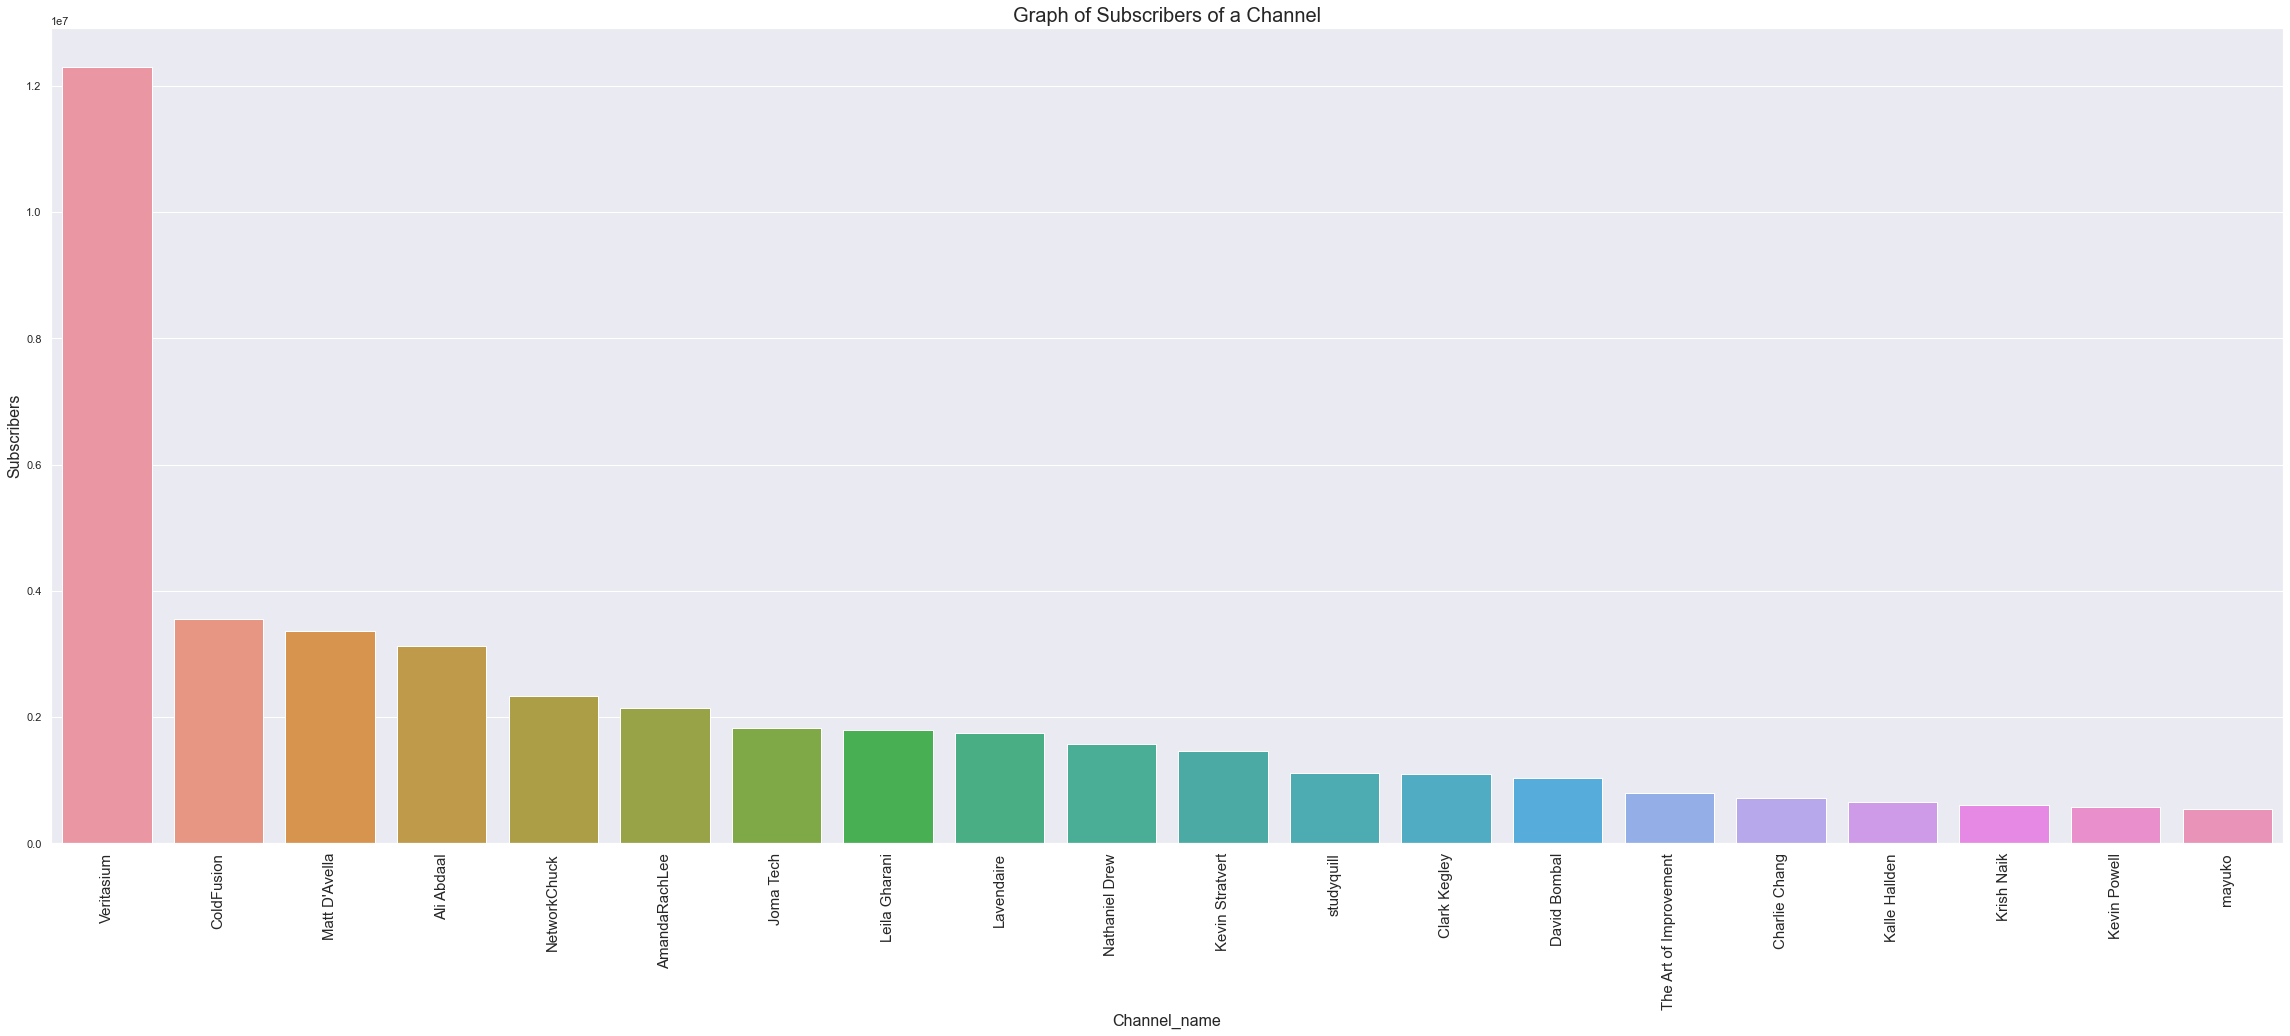

In [90]:
get_graph(ch_df, 'Graph of Subscribers of a Channel', x_axis='Channel_name', y_axis='Subscribers', num=20)

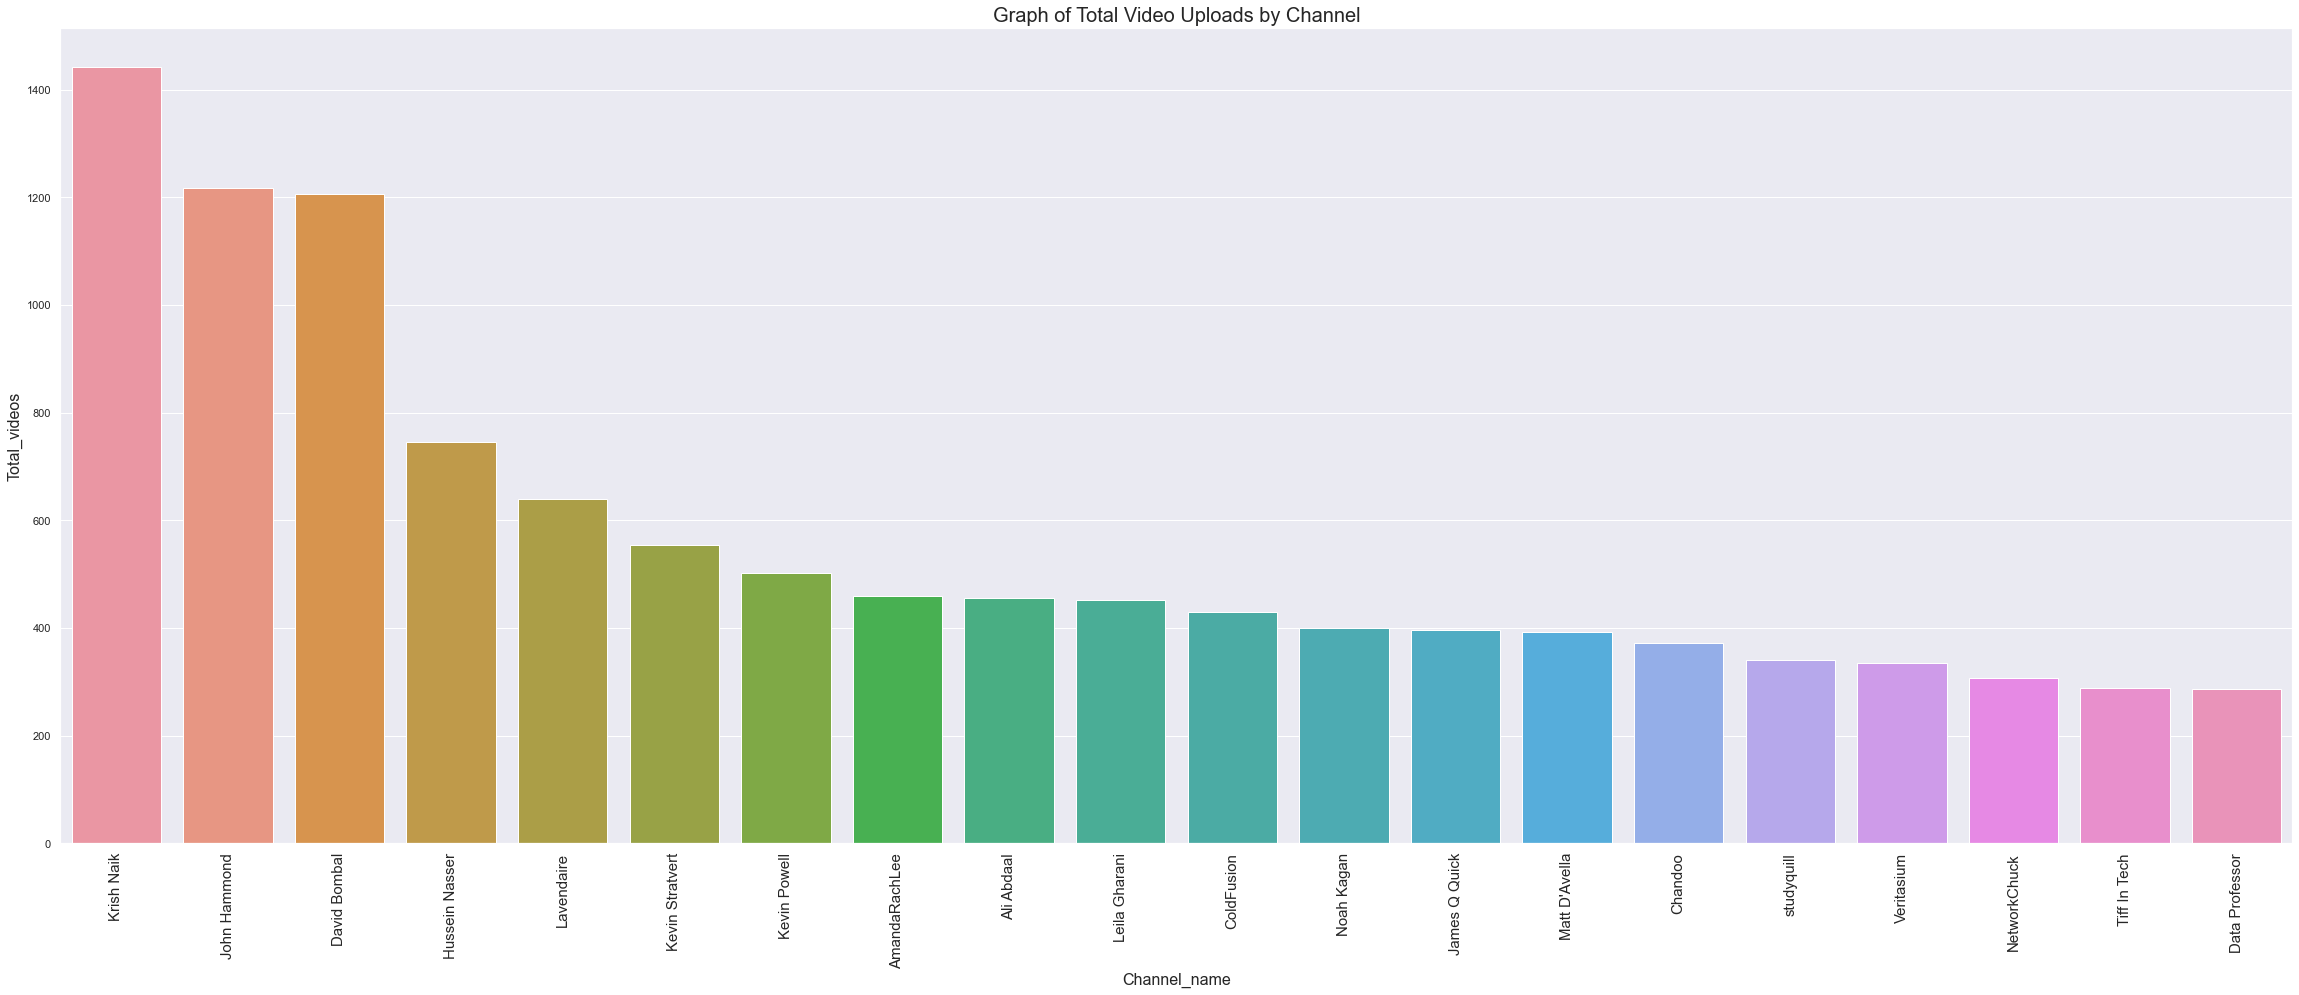

In [91]:
get_graph(ch_df, 'Graph of Total Video Uploads by Channel', x_axis='Channel_name', y_axis='Total_videos', num=20)

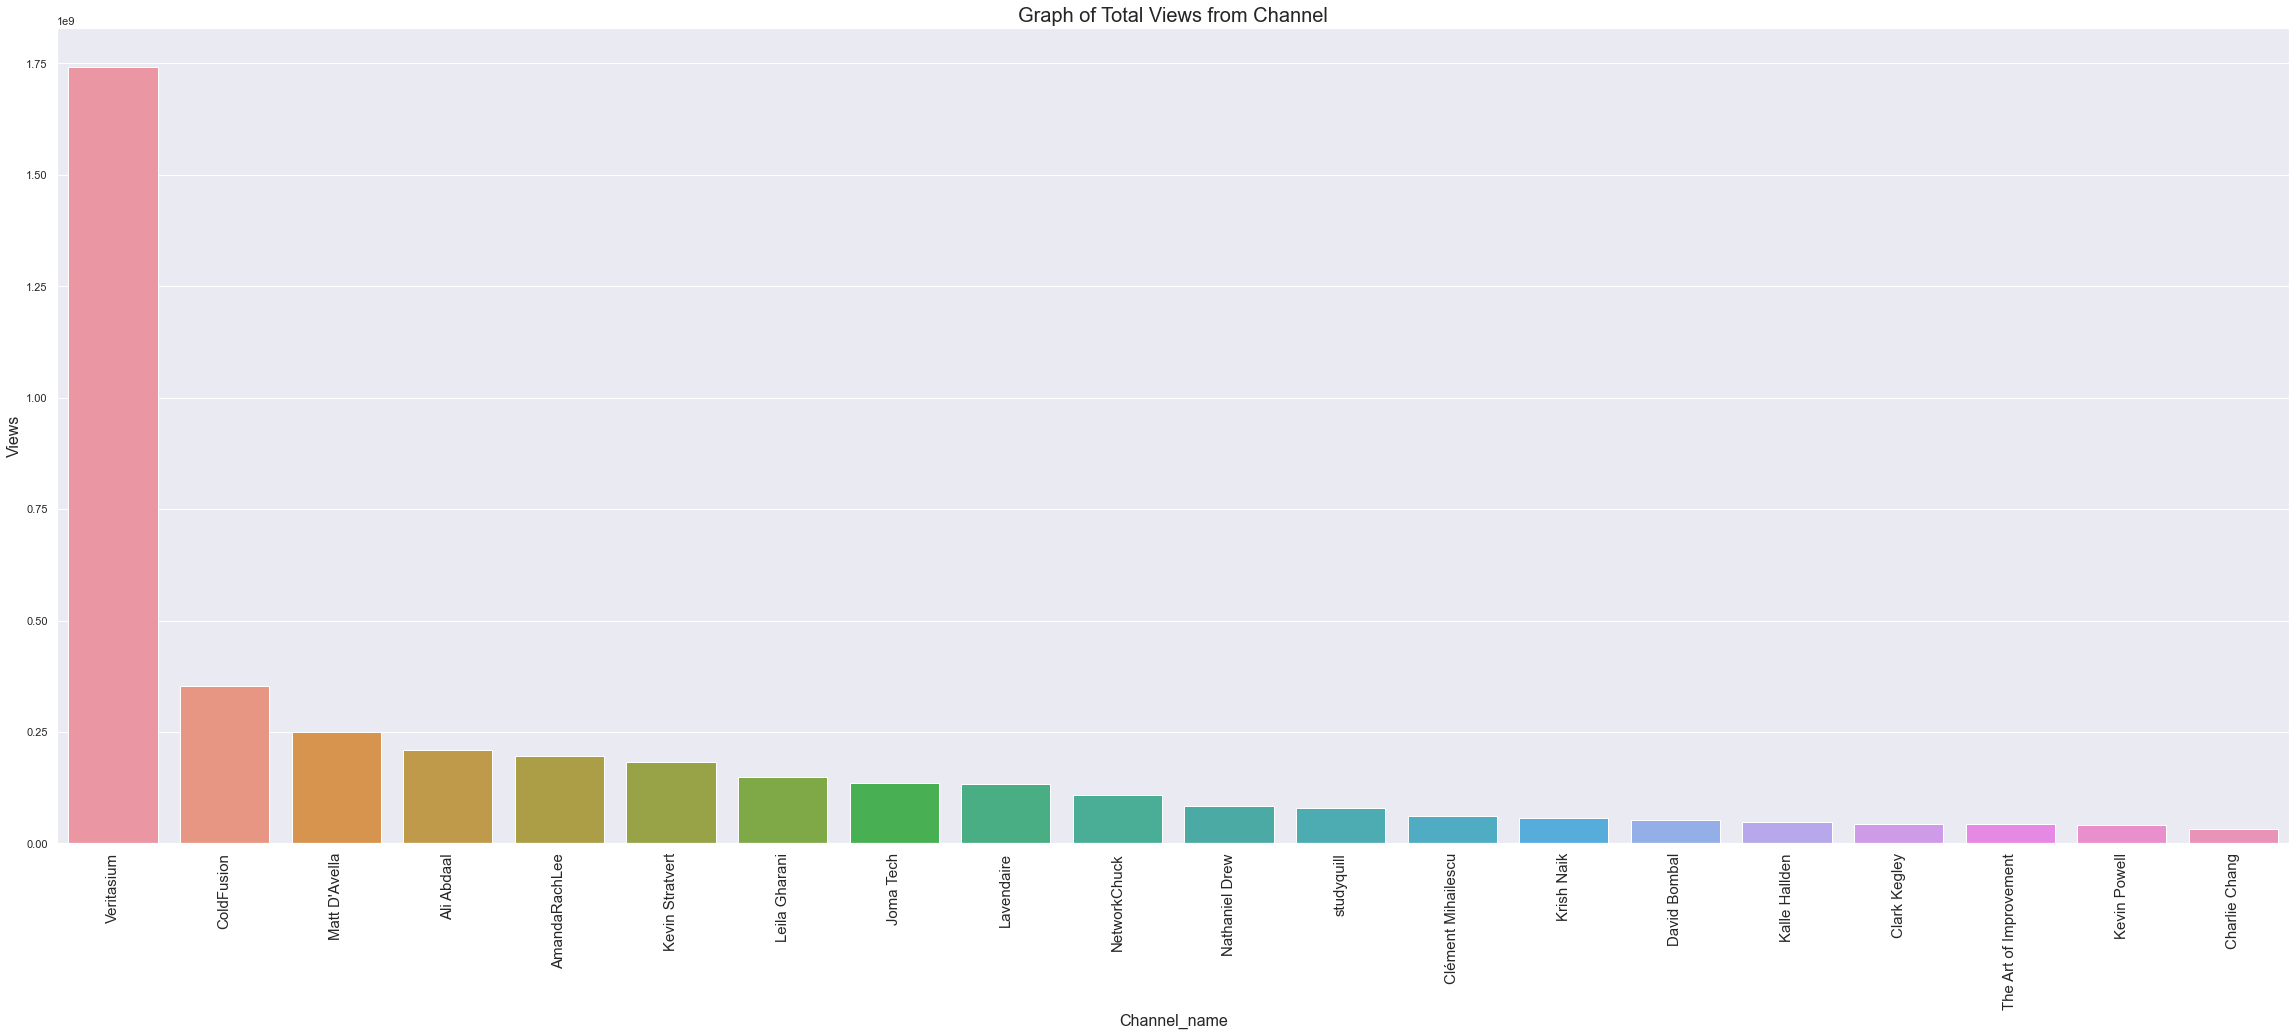

In [92]:
get_graph(ch_df, 'Graph of Total Views from Channel', x_axis='Channel_name', y_axis='Views', num=20)

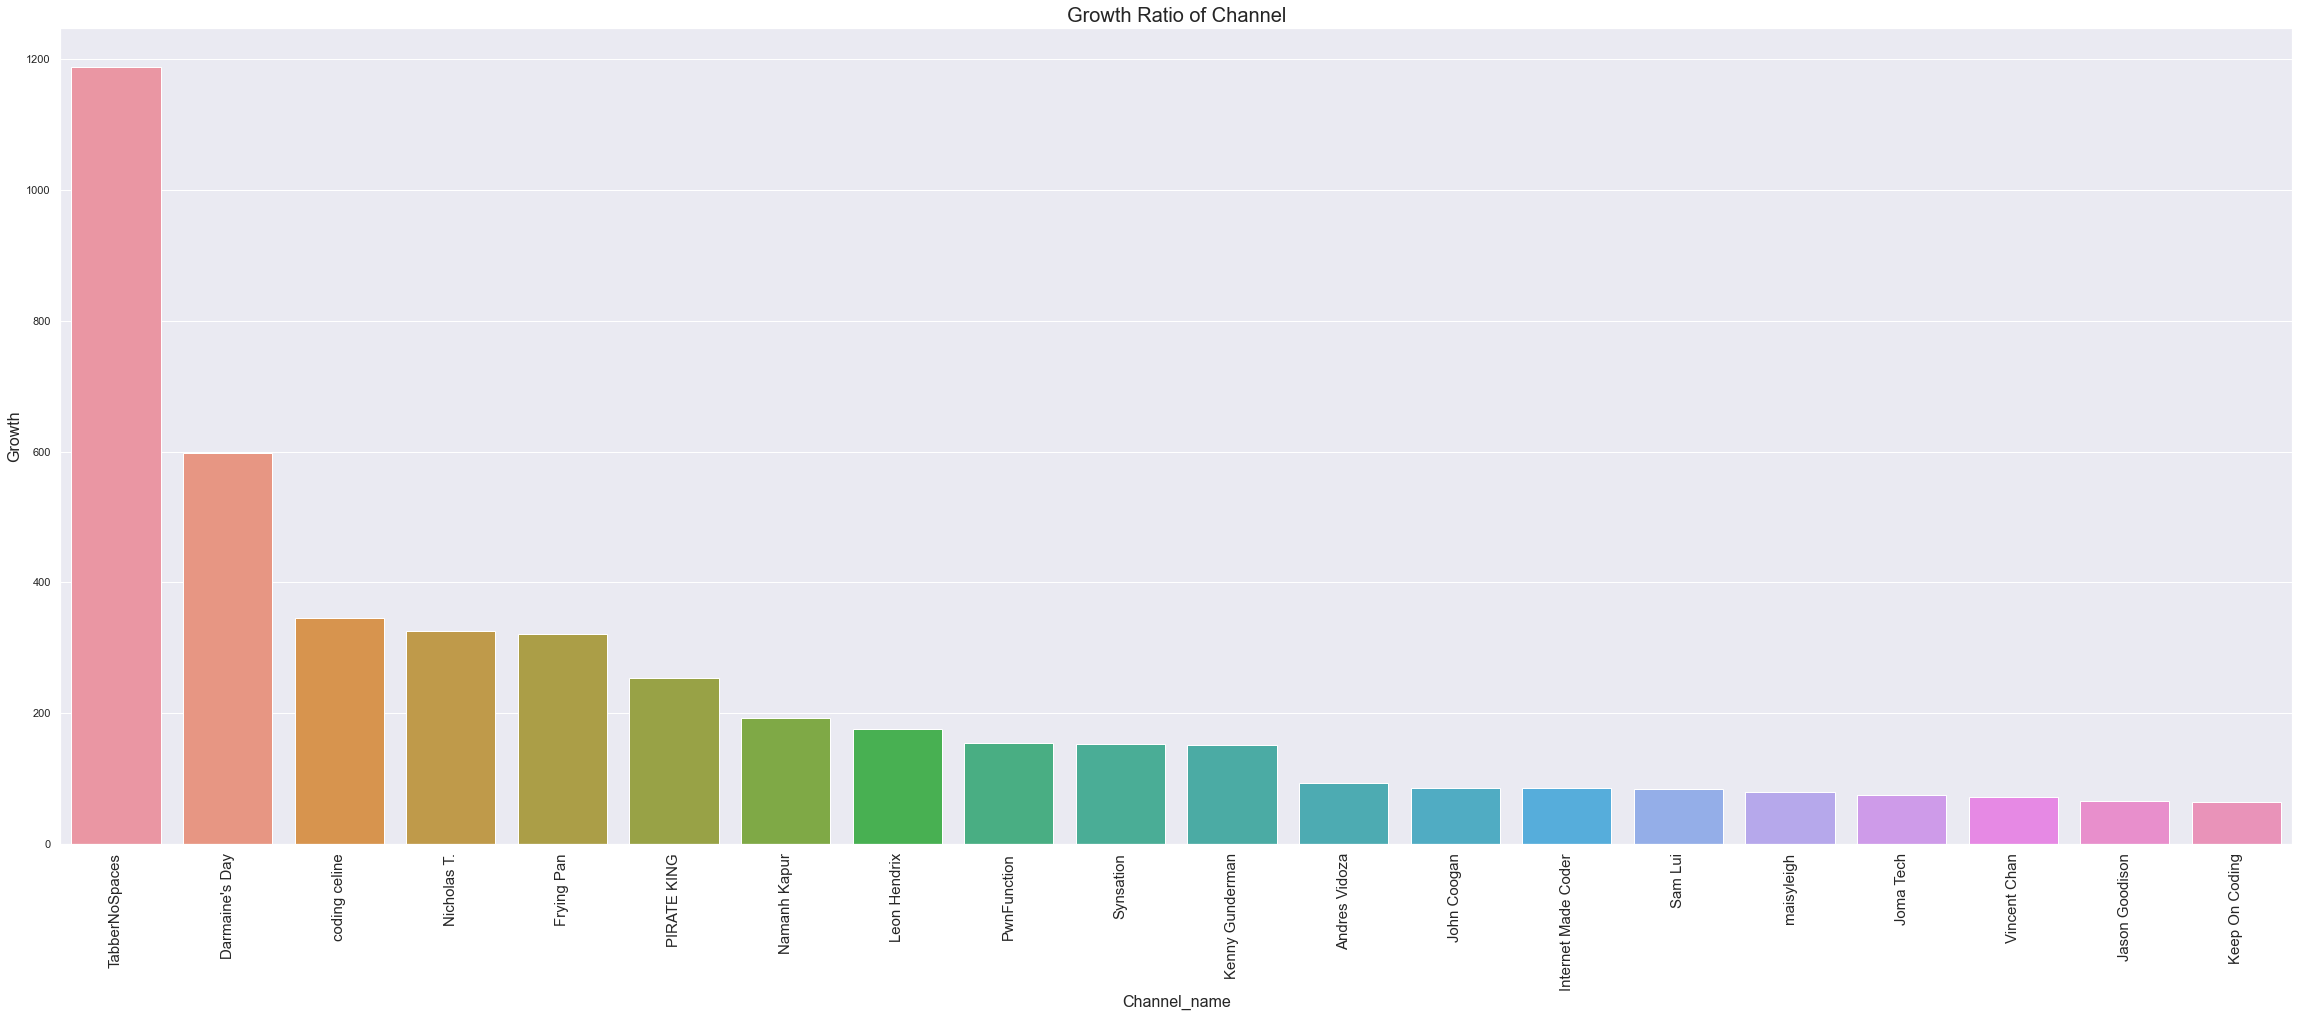

In [93]:
get_graph(ch_df, 'Growth Ratio of Channel', x_axis='Channel_name', y_axis='Growth', num=20)

## Analysing youtube videos from content creators 
---

Subsequently, the video datas are concated from the 3 scraping codebooks. The dataframe is subsequently cleaned by dropping of redundent columns such as the unnamed:0 and the Fav_count columns. Missing data area evaluated to be dropped or retained.

In [94]:
# Section is annoted out as loaded dataset is used
yt1_df = pd.read_csv('./output/vid_data_23_7.csv')
yt2_df = pd.read_csv('./output/vid_data_23_7_2.csv')
yt3_df = pd.read_csv('./output/vid_data_25_7_3.csv')

In [95]:
frames = [yt1_df, yt2_df, yt3_df]

yt_df = pd.concat(frames)
yt_df.drop(columns='Unnamed: 0', inplace = True)

In [96]:
print(yt_df.info())
yt_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15718 entries, 0 to 5270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           15718 non-null  object 
 1   Published_date  15718 non-null  object 
 2   Description     15549 non-null  object 
 3   View_count      15716 non-null  float64
 4   Like_count      15717 non-null  float64
 5   Fav_count       15718 non-null  int64  
 6   Vid_id          15718 non-null  object 
 7   Channel_name    15718 non-null  object 
 8   Time_scrape     15718 non-null  object 
 9   Ch_vid_index    15718 non-null  int64  
 10  Comment_count   15718 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 1.4+ MB
None


,View_count,Like_count,Fav_count,Ch_vid_index,Comment_count
count,1.571600e+04,1.571700e+04,15718.0,15718.000000,15718.000000
mean,2.836670e+05,8.585710e+03,0.0,23.654091,554.307418
std,1.626104e+06,3.705737e+04,0.0,14.399198,3135.899024
min,4.700000e+01,0.000000e+00,0.0,0.000000,0.000000
25%,7.445000e+03,2.270000e+02,0.0,11.000000,23.000000
50%,2.820100e+04,9.900000e+02,0.0,23.000000,79.000000
75%,1.250792e+05,4.178000e+03,0.0,36.000000,269.000000
max,8.688138e+07,1.361357e+06,0.0,49.000000,213462.000000


In [97]:
yt_df.to_csv('./output/eda_yt_df.csv')

In [98]:
yt_df['Description'].isnull().sum(),yt_df['View_count'].isnull().sum(), yt_df['Like_count'].isnull().sum(), yt_df['Comment_count'].isnull().sum(),  yt_df['Title'].isnull().sum()

(169, 2, 1, 0, 0)

From the dataframe there are 169, 2 and 1 null values in the Description, View_count and Like_count column respectively. The description column could be from a result that uploader did not include a discription for the video but missing in data for view_count and like_count missingness can be classified as missing at random [(MCAR)](https://www.ncbi.nlm.nih.gov/books/NBK493614/). Data missing is independent of the observed and unobserved data and since the rows are below the 5% threshold, values can be dropped. 

In [99]:
# Drop Fav_count column
yt_df.drop(columns='Fav_count', inplace=True)

In [100]:
yt_df.head()

,Title,Published_date,Description,View_count,Like_count,Vid_id,Channel_name,Time_scrape,Ch_vid_index,Comment_count
0,Study with me videos are bad for actual learning,2022-07-21T19:15:46Z,"Start using Deepnote for free: https://deepnote.com/?utm_source=creator&utm_medium=video&utm_campaign=learn&utm_content=tina1\n\nIn this video, I talk about the rise and of study with me's and study with me videos are bad for actual learning \n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttps://365datasc...",16757.0,1113.0,sS09Q-rKjos,Tina Huang,2022-07-23 13:33:22.226680,0,143
1,In Defense of Hustle Culture,2022-07-10T15:00:06Z,"Head to http://brilliant.org/TinaHuang/ to get started for free with Brilliant's interactive lessons. The first 200 people will also get 20% off an annual membership.\n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, ANIME, and generally how to get your sh*t together c: \n\nIn this video, I talk about why I still work hard and hustle despite the whole anti-hustle and antiwork stuff that is all the rage these days. \n\n🔗Affiliates\n========================\nMy SQL for d...",46006.0,2457.0,A3x0gYW42Ts,Tina Huang,2022-07-23 13:33:22.335305,1,321
2,Why the best students are NOT the most successful,2022-06-27T15:00:26Z,"Start building your ideal daily routine! The first 100 people who click on the link will get 25% OFF on Fabulous Premium: http://thefab.co/tinahuang2\n\nIn this video, I talk about why students who get the best grades are not the most successful in life! \n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttp...",77435.0,4551.0,egBzpILuNhA,Tina Huang,2022-07-23 13:33:22.439440,2,379
3,How to Make a Self Study Plan (that you don't give up halfway),2022-06-19T16:30:03Z,"✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\nIn this video, I talk about how to make the ULTIMATE self-study plan that you don't give up halfway on! Also that's totally not a chopstick I'm using. idk if people actually read the description so...comment 'chopstick' below if you see this! \n\n🖱️Links mentioned in video\n========================\nDr. Stone: https://myanimelist.net/anime/38691/Dr_Stone\n\n🔗Affili...",44254.0,2683.0,SQNzij5m_Yg,Tina Huang,2022-07-23 13:33:22.505531,3,196
4,I left Meta...and I'm lowkey freaking out 🥲,2022-06-09T14:45:00Z,"I refilmed this video 3 times and then sat on it because I'm absolutely terrified because then it's real real if that makes sense? Also, I'm really scared of what y'all are going to say tbh\n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttps://365datascience.com/learn-sql-for-data-science-interviews/ \n\n...",207709.0,11628.0,8tpha6FIa_k,Tina Huang,2022-07-23 13:33:22.564871,4,799


In [101]:
# Drop of the null values 
df = yt_df.dropna(subset=['View_count', 'Like_count', 'Comment_count'])
print(df.shape)
df.head()

(15715, 10)


,Title,Published_date,Description,View_count,Like_count,Vid_id,Channel_name,Time_scrape,Ch_vid_index,Comment_count
0,Study with me videos are bad for actual learning,2022-07-21T19:15:46Z,"Start using Deepnote for free: https://deepnote.com/?utm_source=creator&utm_medium=video&utm_campaign=learn&utm_content=tina1\n\nIn this video, I talk about the rise and of study with me's and study with me videos are bad for actual learning \n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttps://365datasc...",16757.0,1113.0,sS09Q-rKjos,Tina Huang,2022-07-23 13:33:22.226680,0,143
1,In Defense of Hustle Culture,2022-07-10T15:00:06Z,"Head to http://brilliant.org/TinaHuang/ to get started for free with Brilliant's interactive lessons. The first 200 people will also get 20% off an annual membership.\n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, ANIME, and generally how to get your sh*t together c: \n\nIn this video, I talk about why I still work hard and hustle despite the whole anti-hustle and antiwork stuff that is all the rage these days. \n\n🔗Affiliates\n========================\nMy SQL for d...",46006.0,2457.0,A3x0gYW42Ts,Tina Huang,2022-07-23 13:33:22.335305,1,321
2,Why the best students are NOT the most successful,2022-06-27T15:00:26Z,"Start building your ideal daily routine! The first 100 people who click on the link will get 25% OFF on Fabulous Premium: http://thefab.co/tinahuang2\n\nIn this video, I talk about why students who get the best grades are not the most successful in life! \n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttp...",77435.0,4551.0,egBzpILuNhA,Tina Huang,2022-07-23 13:33:22.439440,2,379
3,How to Make a Self Study Plan (that you don't give up halfway),2022-06-19T16:30:03Z,"✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\nIn this video, I talk about how to make the ULTIMATE self-study plan that you don't give up halfway on! Also that's totally not a chopstick I'm using. idk if people actually read the description so...comment 'chopstick' below if you see this! \n\n🖱️Links mentioned in video\n========================\nDr. Stone: https://myanimelist.net/anime/38691/Dr_Stone\n\n🔗Affili...",44254.0,2683.0,SQNzij5m_Yg,Tina Huang,2022-07-23 13:33:22.505531,3,196
4,I left Meta...and I'm lowkey freaking out 🥲,2022-06-09T14:45:00Z,"I refilmed this video 3 times and then sat on it because I'm absolutely terrified because then it's real real if that makes sense? Also, I'm really scared of what y'all are going to say tbh\n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttps://365datascience.com/learn-sql-for-data-science-interviews/ \n\n...",207709.0,11628.0,8tpha6FIa_k,Tina Huang,2022-07-23 13:33:22.564871,4,799


## Preliminart EDA on videos data

In [102]:
yt_df['Title_length'] = yt_df['Title'].str.len()
yt_df['Title_word_count'] = yt_df['Title'].str.split().str.len()

In [103]:
yt_df['Description_length'] = yt_df['Description'].str.len()
yt_df['Description_word_count'] = yt_df['Description'].str.split().str.len()

In [104]:
yt_df.reset_index(inplace=True)

In [105]:
def histograms(data_1, col, plot_title):
    #fig, ax = plt.subplot(figsize=(20,10), sharey=True)
    #ax = ax.ravel()
    sns.set(rc={'figure.figsize':(30,10)})
    # Plot first df   
    g = sns.histplot(data=data_1, x=data_1[col]) #ax = ax[0])
    mean = data_1[col].mean()
    g.axvline(mean, ls='-.', color='black')
    g.set_title(f' Description of video (Mean: {round(mean)})', fontsize=16)
    g.set_xlabel(f'Length of {col.capitalize()}')
    plt.suptitle(plot_title, fontsize=50)
    plt.tight_layout()  

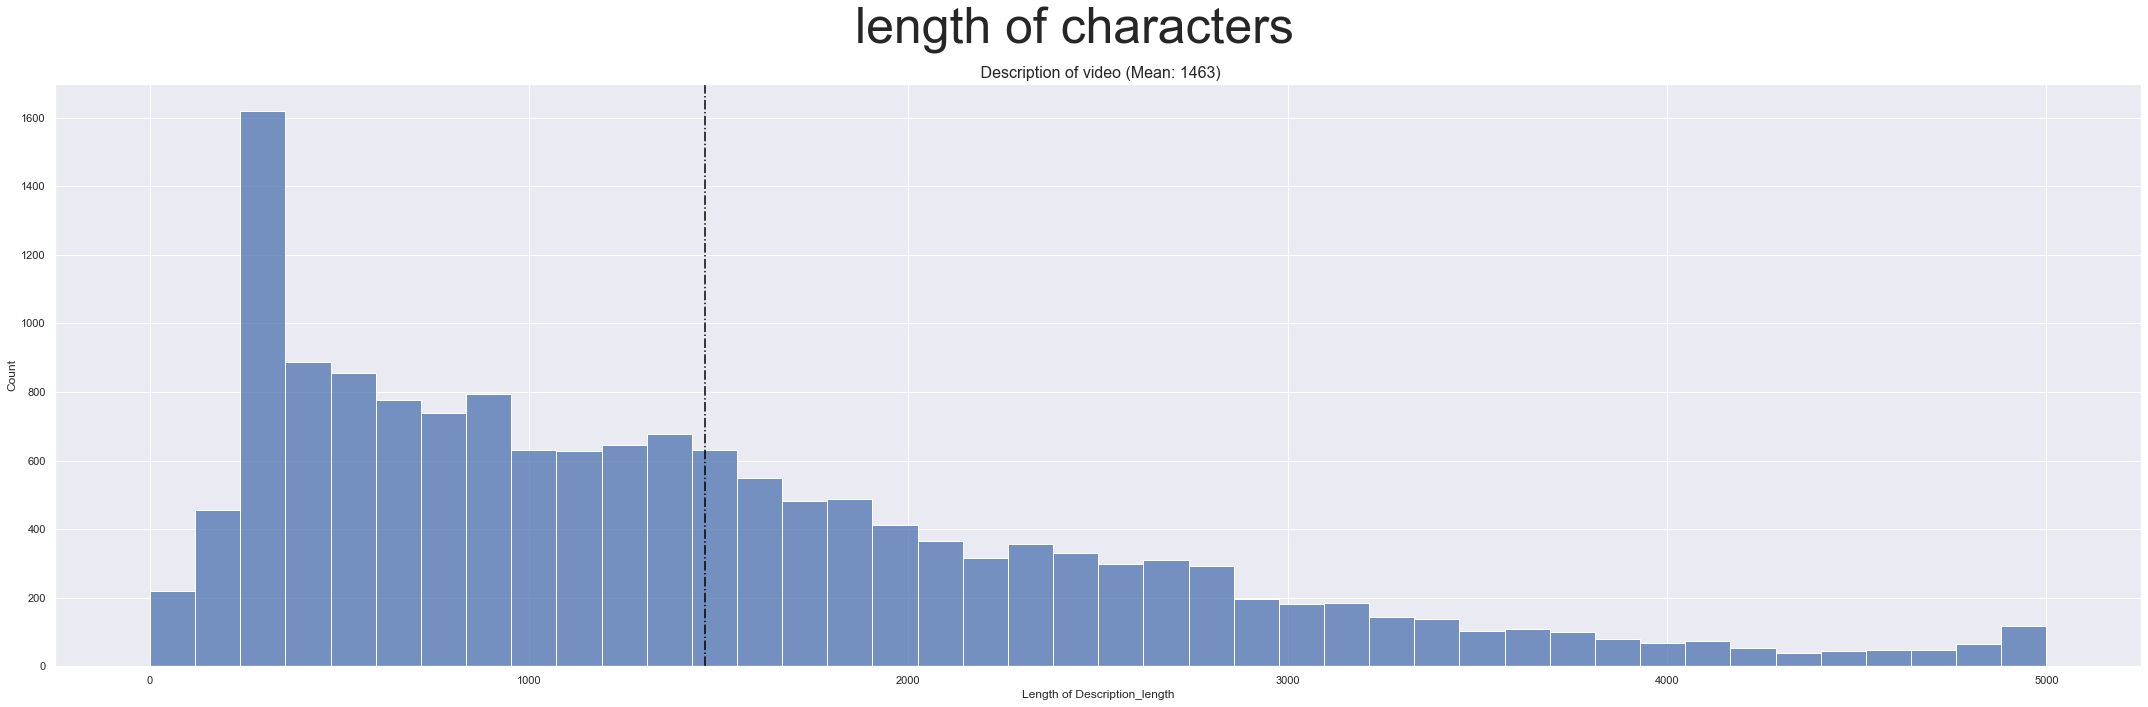

In [106]:
histograms(yt_df, 'Description_length', 'length of characters')

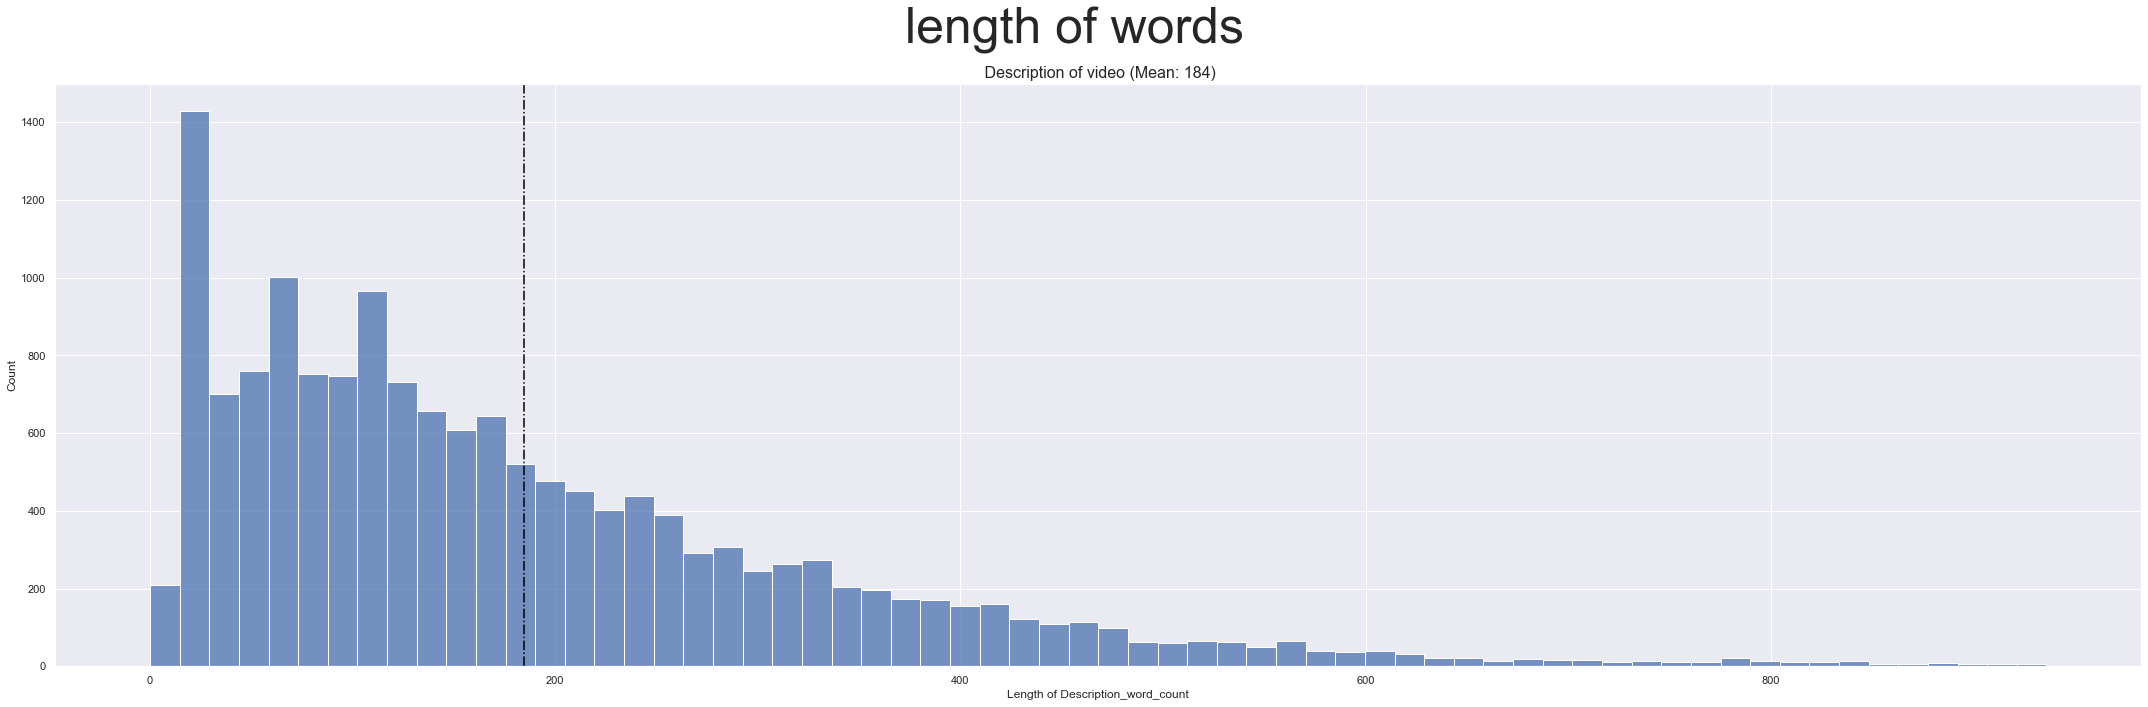

In [107]:
histograms(yt_df, 'Description_word_count', 'length of words')

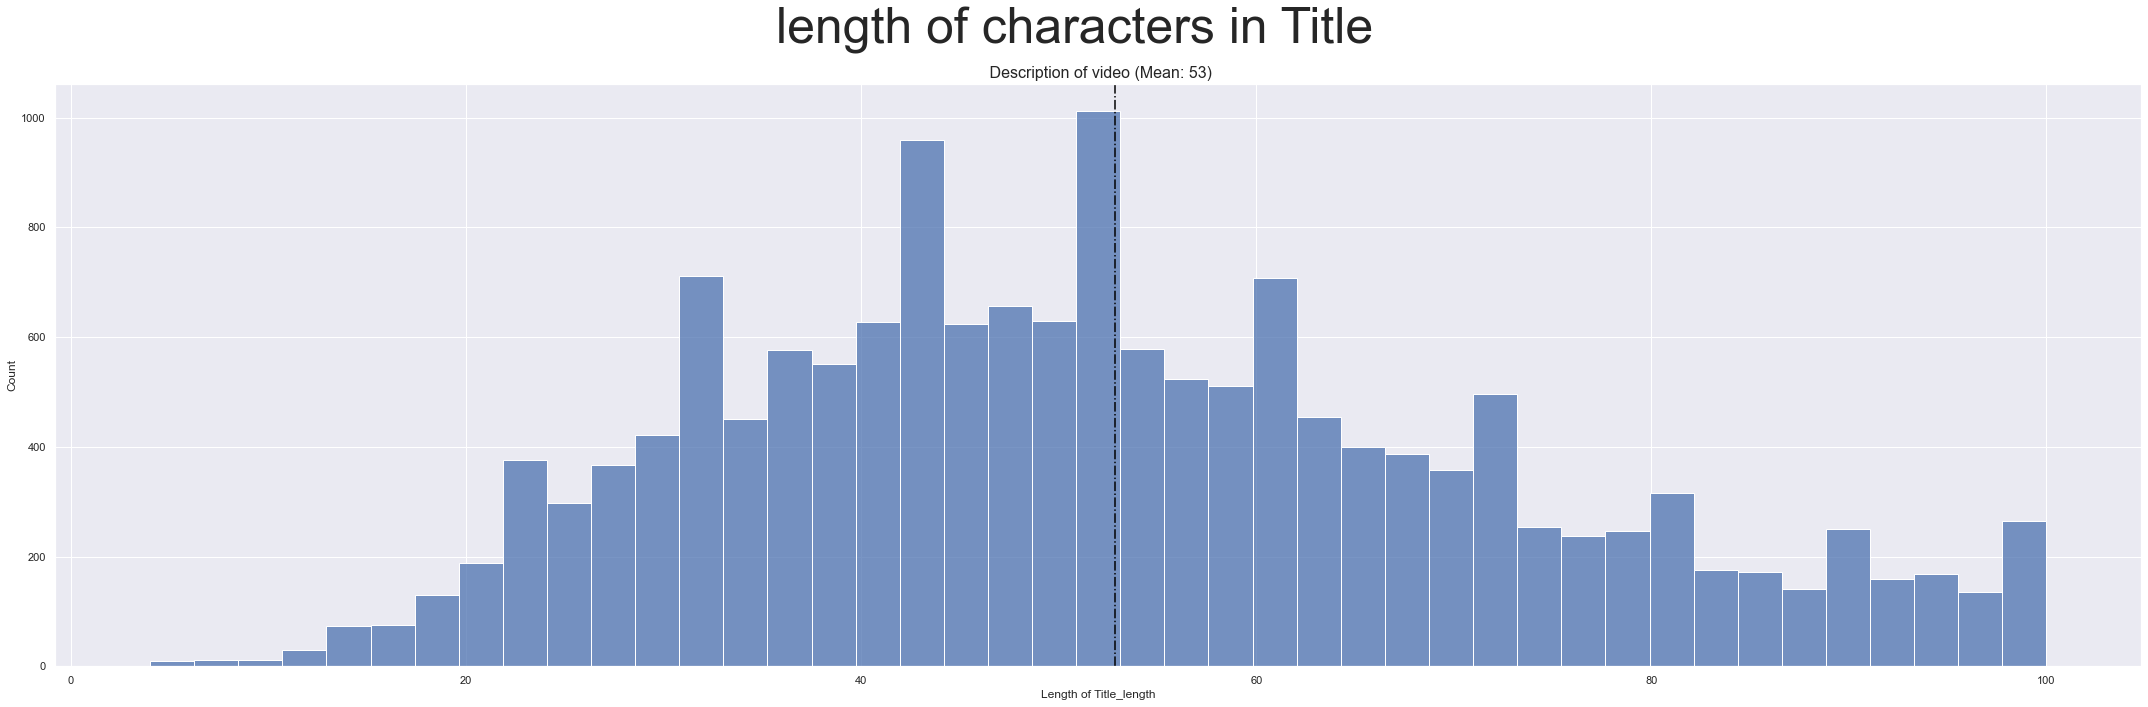

In [108]:
histograms(yt_df, 'Title_length', 'length of characters in Title')

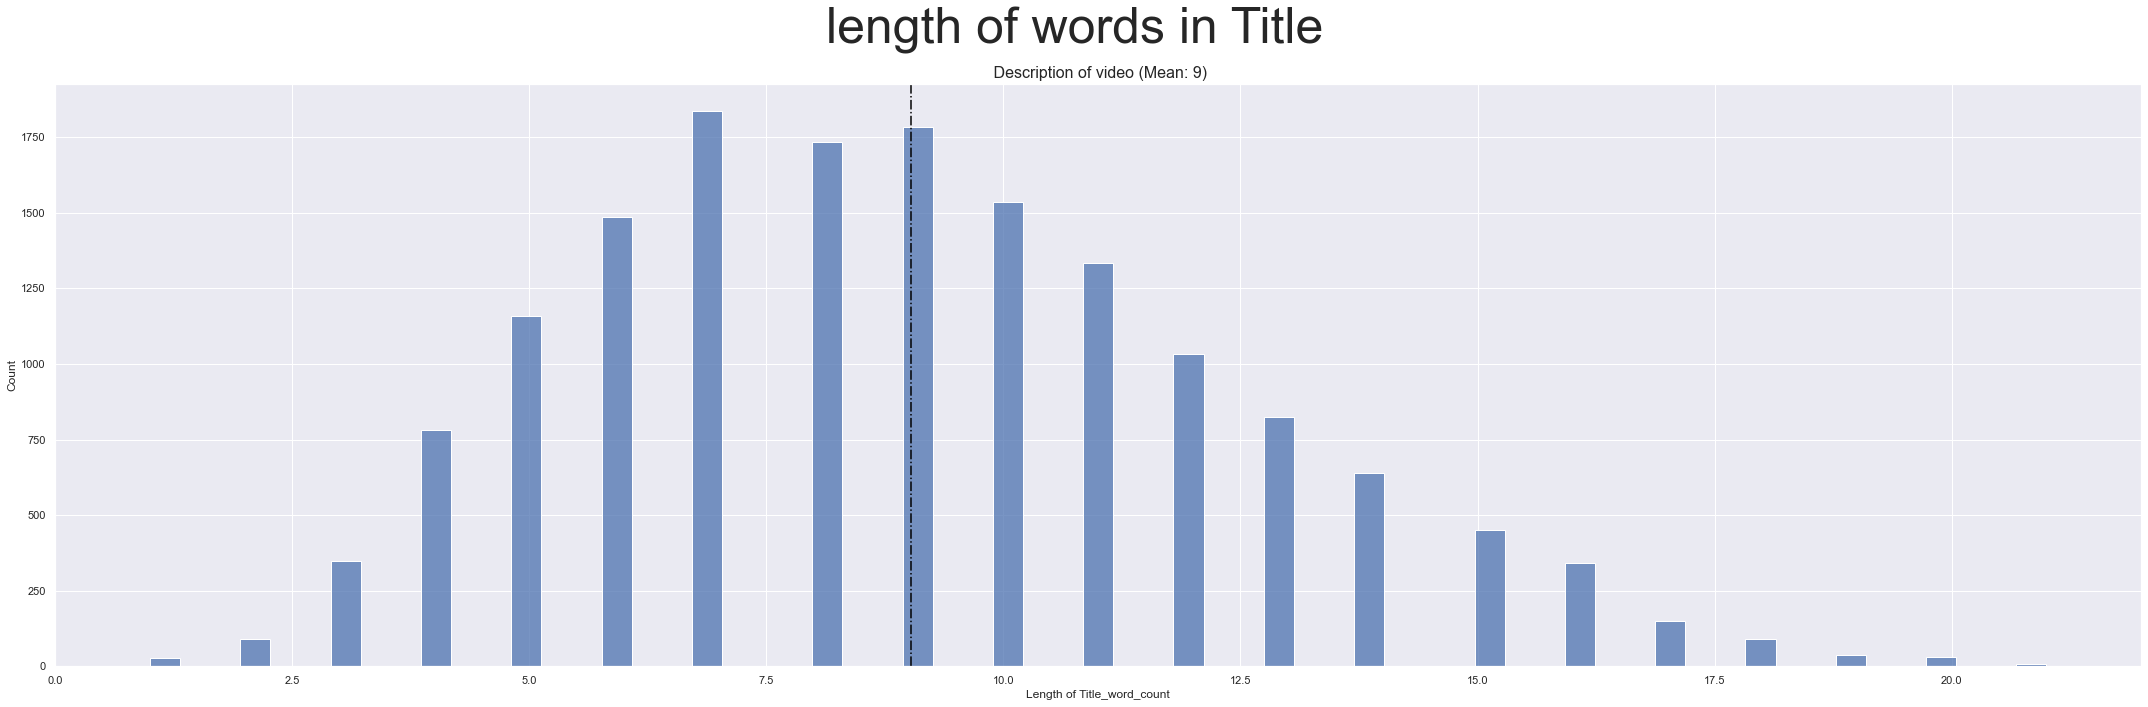

In [109]:
histograms(yt_df, 'Title_word_count', 'length of words in Title')

In [110]:
print(yt_df.shape)
yt_df.describe()

(15718, 15)


,index,View_count,Like_count,Ch_vid_index,Comment_count,Title_length,Title_word_count,Description_length,Description_word_count
count,15718.000000,1.571600e+04,1.571700e+04,15718.000000,15718.000000,15718.000000,15718.000000,15549.000000,15549.000000
mean,2709.384400,2.836670e+05,8.585710e+03,23.654091,554.307418,52.823833,9.023349,1463.392951,184.342852
std,1658.135293,1.626104e+06,3.705737e+04,14.399198,3135.899024,19.725028,3.411843,1085.152636,152.329210
min,0.000000,4.700000e+01,0.000000e+00,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000
25%,1309.250000,7.445000e+03,2.270000e+02,11.000000,23.000000,38.000000,7.000000,571.000000,70.000000
50%,2619.000000,2.820100e+04,9.900000e+02,23.000000,79.000000,51.000000,9.000000,1223.000000,142.000000
75%,3929.000000,1.250792e+05,4.178000e+03,36.000000,269.000000,66.000000,11.000000,2075.000000,255.000000
max,6413.000000,8.688138e+07,1.361357e+06,49.000000,213462.000000,100.000000,21.000000,5000.000000,936.000000


In [111]:
missing = yt_df['Description'].isnull().sum()/15718*100
print(f'The amount of null rows in the description column is {missing:.2f} %.')

The amount of null rows in the description column is 1.08 %.


**Summary of Preliminary EDA**

Besides the use of the numerical data within the dataframe, text data can be scrutinized to gain greater insights into the topics which may contribute to the model.

From the above graph, the mean words for title column is 9 while the mean word count within the description is 184 words. The description column has 1.08% of null values. 

## Data Cleaning of output columns
---

A new dataframe is created to analyse on the text columns within the dataframe. The null rows within the description column, the title is filled in the description column. The column description is converted to text. 

The text data is cleanned in the following manner:
1. Word is demojied
2. Regex is removed
3. Lemmatizing and Stemming (word normalization)

Ploting of the unigram, bigram and trigram are used to evaluate on the top 10 words and expand and exclude the stop word list if nescessary.

In [112]:
# Function to get dataframe + preliminary cleaning
def get_df(df_full):
    # Returning following three columns 'subreddit', 'title', 'selftext'.
    df = yt_df[['Vid_id','Title', 'Channel_name', 'Description']]
    # Renaming 'selftext' column to 'body':
    df_c = df.copy()
    df_c.rename(columns = {'Description': 'text'}, inplace = True)
    # View dataframe using info
    # Fill empty 'text' cells with 'title'
    df_c['text'].fillna(df_c['Title'], inplace = True) 
    print(f" ")
    print(df_c.info())
    return df_c

In [113]:
df_tok = get_df(yt_df)

 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15718 entries, 0 to 15717
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Vid_id        15718 non-null  object
 1   Title         15718 non-null  object
 2   Channel_name  15718 non-null  object
 3   text          15718 non-null  object
dtypes: object(4)
memory usage: 491.3+ KB
None


In [114]:
df_tok.head()

,Vid_id,Title,Channel_name,text
0,sS09Q-rKjos,Study with me videos are bad for actual learning,Tina Huang,"Start using Deepnote for free: https://deepnote.com/?utm_source=creator&utm_medium=video&utm_campaign=learn&utm_content=tina1\n\nIn this video, I talk about the rise and of study with me's and study with me videos are bad for actual learning \n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttps://365datasc..."
1,A3x0gYW42Ts,In Defense of Hustle Culture,Tina Huang,"Head to http://brilliant.org/TinaHuang/ to get started for free with Brilliant's interactive lessons. The first 200 people will also get 20% off an annual membership.\n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, ANIME, and generally how to get your sh*t together c: \n\nIn this video, I talk about why I still work hard and hustle despite the whole anti-hustle and antiwork stuff that is all the rage these days. \n\n🔗Affiliates\n========================\nMy SQL for d..."
2,egBzpILuNhA,Why the best students are NOT the most successful,Tina Huang,"Start building your ideal daily routine! The first 100 people who click on the link will get 25% OFF on Fabulous Premium: http://thefab.co/tinahuang2\n\nIn this video, I talk about why students who get the best grades are not the most successful in life! \n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttp..."
3,SQNzij5m_Yg,How to Make a Self Study Plan (that you don't give up halfway),Tina Huang,"✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\nIn this video, I talk about how to make the ULTIMATE self-study plan that you don't give up halfway on! Also that's totally not a chopstick I'm using. idk if people actually read the description so...comment 'chopstick' below if you see this! \n\n🖱️Links mentioned in video\n========================\nDr. Stone: https://myanimelist.net/anime/38691/Dr_Stone\n\n🔗Affili..."
4,8tpha6FIa_k,I left Meta...and I'm lowkey freaking out 🥲,Tina Huang,"I refilmed this video 3 times and then sat on it because I'm absolutely terrified because then it's real real if that makes sense? Also, I'm really scared of what y'all are going to say tbh\n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttps://365datascience.com/learn-sql-for-data-science-interviews/ \n\n..."


## Tokenizing of corpus

In [115]:
# Define the function to see how many words were in the body before cleaning the data.
def word_count(series):
    # Change all the capital letters to snake case
    list_tokens = [w.lower() for w in series]
    string_tokens = str(list_tokens)
    tokens = BeautifulSoup(string_tokens).get_text()
    return tokens

In [116]:
len(word_count(df_tok['text']).split())

2565138

In [117]:
len(word_count(df_tok['Title']).split())

141815

## Stop words for the cleaning of the dictionaries

In [118]:
# Determining the stopwords list
stop_words = stopwords.words('english')
extra_words = ['www', 'https', 'youtube', 'com', 'video', 'part', 'http', 'ly', 'videos', 'lavendaire']
#excl_words = ['she', 'not']
stop_words.extend(extra_words)
#stop_words.remove('she')
#stop_words.remove('not')

# Save clean corpus into dataframe

In [119]:
def clean_words(status):
    '''takes a series and cleans the text data '''
    bw = []
    
    # De-emojizing of the   
    demoji_words =  emoji.demojize(status, delimiters=(":", ":"))
    
    # Removed Regex
    letters_only = re.sub('[^a-zA-Z]', ' ', demoji_words)
       
    # Removed Non-letters
    words = letters_only.lower().split()
    
    # Tokenize without official tokenizer
    stops = set(stop_words)
    
    # Remove Stopwords 
    meaningful_words = [w for w in words if w not in stops]
    return(' '.join(meaningful_words))

In [120]:
df_tok['text_cln'] = df_tok['text'].map(clean_words)

In [121]:
df_tok['Title_cln'] = df_tok['Title'].map(clean_words)

### EDA on the top text in the Text column

In [122]:
# Creating plots for the tokenizing for the eda
def plot_top_tokens(df, col, n, n_gram_range, title, palette='tab10'):
    def get_top_n_tokens(corpus, n=n, k=n_gram_range):     
        vec = CountVectorizer(ngram_range=(k,k), stop_words = stop_words).fit(corpus)     
        bag_of_words = vec.transform(corpus)     
        sum_words = bag_of_words.sum(axis=0)      
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]    
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
        return words_freq[:n]
    
    temp_df = pd.DataFrame(data=get_top_n_tokens(df[col], n), columns=['word','freq'])
    plt.figure(figsize=(10,6))
    sns.barplot(data=temp_df, y='word', x='freq', palette=palette)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(title, fontsize=18)

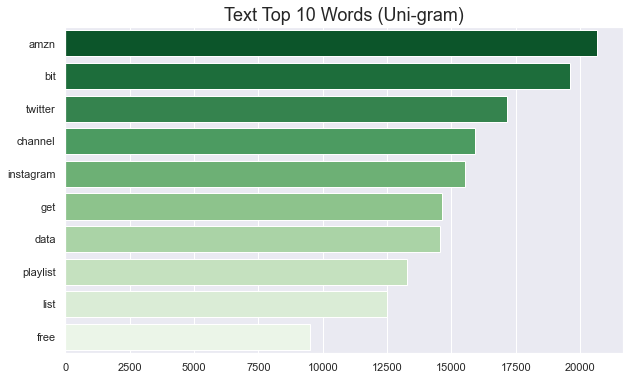

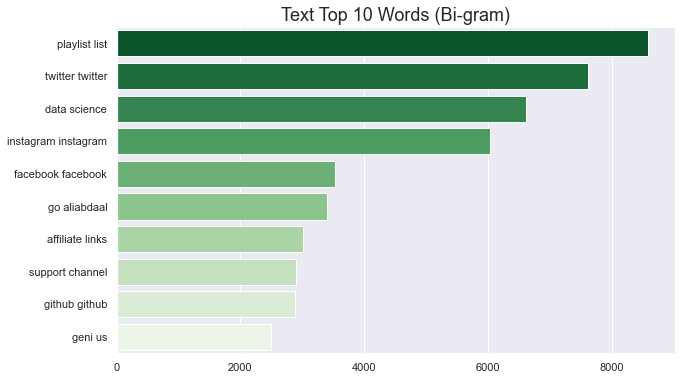

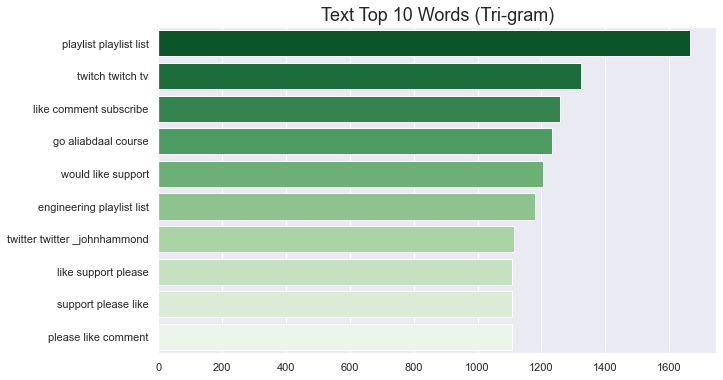

In [123]:
plot_top_tokens(df_tok, 'text', 10, 1, 'Text Top 10 Words (Uni-gram)', 'Greens_r')
plot_top_tokens(df_tok, 'text', 10, 2, 'Text Top 10 Words (Bi-gram)', 'Greens_r')
plot_top_tokens(df_tok, 'text', 10, 3, 'Text Top 10 Words (Tri-gram)', 'Greens_r')

### EDA on the top text in the Title column

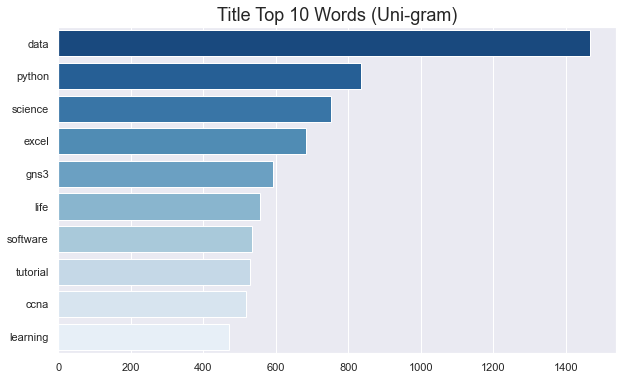

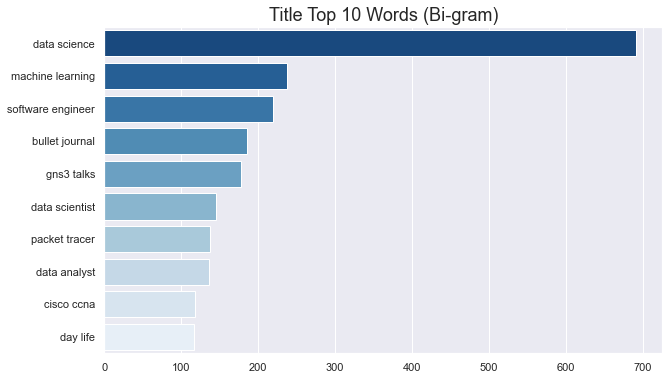

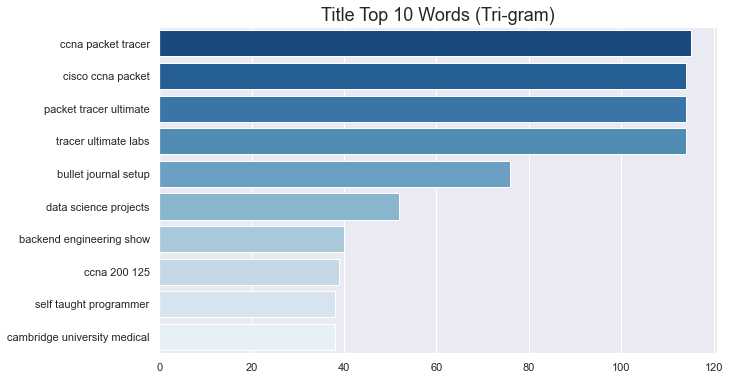

In [124]:
plot_top_tokens(df_tok, 'Title', 10, 1, 'Title Top 10 Words (Uni-gram)', 'Blues_r')
plot_top_tokens(df_tok, 'Title', 10, 2, 'Title Top 10 Words (Bi-gram)', 'Blues_r')
plot_top_tokens(df_tok, 'Title', 10, 3, 'Title Top 10 Words (Tri-gram)', 'Blues_r')

In [125]:
b_text = len(word_count(df_tok['text']).split())
a_text = len(word_count(df_tok['text_cln']).split())
print(f'The length of corpus for the text reduces from {b_text} words to {a_text} words.')
print()
b_Title = len(word_count(df_tok['Title']).split())
a_Title = len(word_count(df_tok['Title_cln']).split())
print(f'The length of corpus for the text reduces from {b_Title} words to {a_Title} words.')

The length of corpus for the text reduces from 2565138 words to 2205729 words.

The length of corpus for the text reduces from 141815 words to 92150 words.


In [126]:
len(word_count(df_tok['text_cln']).split())

2205729

## Use of lemmatizer on the dataframe

In [127]:
lemmatizer = WordNetLemmatizer()
def lemmatizer_words(status):
    '''takes a series and cleans the text data '''
    bw = []
    
    # De-emojizing of the   
    demoji_words =  emoji.demojize(status, delimiters=(":", ":"))
    
    # Removed Regex
    letters_only = re.sub('[^a-zA-Z]', ' ', demoji_words)
       
    # Removed Non-letters
    words = letters_only.lower().split()
    
    # Tokenize without official tokenizer
    stops = set(stop_words)
    
    # Remove Stopwords & lemmatizing
    meaningful_words = [lemmatizer.lemmatize(w) for w in words if w not in stops]
    return(' '.join(meaningful_words))

In [128]:
df_tok['text_lemma'] = df_tok['text'].map(lemmatizer_words)

In [129]:
print('Description')
print(df_tok['text'][0])
print('\n After cleaning \n')
print(df_tok['text_lemma'][0])

Description
Start using Deepnote for free: https://deepnote.com/?utm_source=creator&utm_medium=video&utm_campaign=learn&utm_content=tina1

In this video, I talk about the rise and of study with me's and study with me videos are bad for actual learning 

✉️ NEWSLETTER: https://tinahuang.substack.com/ 
It's about learning, coding, and generally how to get your sh*t together c: 

🔗Affiliates
My SQL for data science interviews course (10 full interviews):
https://365datascience.com/learn-sql-for-data-science-interviews/ 

365 Data Science: 
https://365datascience.pxf.io/WD0za3 (link for 57% discount for their complete data science training)

Check out StrataScratch for data science interview prep: 
https://stratascratch.com/?via=tina

🎥 My filming setup 
📷 camera: https://amzn.to/3LHbi7N
🎤 mic: https://amzn.to/3LqoFJb
🔭 tripod: https://amzn.to/3DkjGHe
💡 lights: https://amzn.to/3LmOhqk

📲Socials 
instagram: https://www.instagram.com/hellotinah/
linkedin: https://www.linkedin.com/in/tinaw-h/

## Use of stemmer on the dataframe

In [130]:
def stemming_words(status):
    '''takes a series and cleans the text data '''
    # De-emojizing of the   
    demoji_words =  emoji.demojize(status, delimiters=(":", ":"))
    #print(demoji_words)
    
    # Removed Regex
    letters_only = re.sub('[^a-zA-Z]', ' ', demoji_words)
       
    # Removed Non-letters
    words = letters_only.lower().split()
    
    # Tokenize without official tokenizer
    stops = set(stop_words)
        
    # Remove Stopwords & lemmatizing / stemming
    stemmer = PorterStemmer()
    meaningful_words = [stemmer.stem(w) for w in words if w not in stops]
    return(' '.join(meaningful_words))

In [131]:
df_tok['text_stem'] = df_tok['text'].map(stemming_words)

In [132]:
print('///Text///')
print(df_tok['text'][0])
print('\n ///After cleaning/// \n')
print(df_tok['text_stem'][0])

///Text///
Start using Deepnote for free: https://deepnote.com/?utm_source=creator&utm_medium=video&utm_campaign=learn&utm_content=tina1

In this video, I talk about the rise and of study with me's and study with me videos are bad for actual learning 

✉️ NEWSLETTER: https://tinahuang.substack.com/ 
It's about learning, coding, and generally how to get your sh*t together c: 

🔗Affiliates
My SQL for data science interviews course (10 full interviews):
https://365datascience.com/learn-sql-for-data-science-interviews/ 

365 Data Science: 
https://365datascience.pxf.io/WD0za3 (link for 57% discount for their complete data science training)

Check out StrataScratch for data science interview prep: 
https://stratascratch.com/?via=tina

🎥 My filming setup 
📷 camera: https://amzn.to/3LHbi7N
🎤 mic: https://amzn.to/3LqoFJb
🔭 tripod: https://amzn.to/3DkjGHe
💡 lights: https://amzn.to/3LmOhqk

📲Socials 
instagram: https://www.instagram.com/hellotinah/
linkedin: https://www.linkedin.com/in/tinaw-h/ 

In [133]:
b_stem = len(word_count(df_tok['text']).split())
a_stem = len(word_count(df_tok['text_stem']).split())
print(f'The length of corpus for the text reduces from {b_stem} words to {a_stem} words.')
print()
b_lemma = len(word_count(df_tok['text']).split())
a_lemma = len(word_count(df_tok['text_lemma']).split())
print(f'The length of corpus for the text reduces from {b_lemma} words to {a_lemma} words.')


The length of corpus for the text reduces from 2565138 words to 2205729 words.

The length of corpus for the text reduces from 2565138 words to 2205729 words.


In [134]:
df_tok.head()

,Vid_id,Title,Channel_name,text,text_cln,Title_cln,text_lemma,text_stem
0,sS09Q-rKjos,Study with me videos are bad for actual learning,Tina Huang,"Start using Deepnote for free: https://deepnote.com/?utm_source=creator&utm_medium=video&utm_campaign=learn&utm_content=tina1\n\nIn this video, I talk about the rise and of study with me's and study with me videos are bad for actual learning \n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttps://365datasc...",start using deepnote free deepnote utm source creator utm medium utm campaign learn utm content tina talk rise study study bad actual learning envelope newsletter tinahuang substack learning coding generally get sh together c link affiliates sql data science interviews course full interviews datascience learn sql data science interviews data science datascience pxf io wd za link discount complete data science training check stratascratch data science interview prep stratascratch via tina mov...,study bad actual learning,start using deepnote free deepnote utm source creator utm medium utm campaign learn utm content tina talk rise study study bad actual learning envelope newsletter tinahuang substack learning coding generally get sh together c link affiliate sql data science interview course full interview datascience learn sql data science interview data science datascience pxf io wd za link discount complete data science training check stratascratch data science interview prep stratascratch via tina movie c...,start use deepnot free deepnot utm sourc creator utm medium utm campaign learn utm content tina talk rise studi studi bad actual learn envelop newslett tinahuang substack learn code gener get sh togeth c link affili sql data scienc interview cours full interview datasci learn sql data scienc interview data scienc datasci pxf io wd za link discount complet data scienc train check stratascratch data scienc interview prep stratascratch via tina movi camera film setup camera camera amzn lhbi n m...
1,A3x0gYW42Ts,In Defense of Hustle Culture,Tina Huang,"Head to http://brilliant.org/TinaHuang/ to get started for free with Brilliant's interactive lessons. The first 200 people will also get 20% off an annual membership.\n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, ANIME, and generally how to get your sh*t together c: \n\nIn this video, I talk about why I still work hard and hustle despite the whole anti-hustle and antiwork stuff that is all the rage these days. \n\n🔗Affiliates\n========================\nMy SQL for d...",head brilliant org tinahuang get started free brilliant interactive lessons first people also get annual membership envelope newsletter tinahuang substack learning anime generally get sh together c talk still work hard hustle despite whole anti hustle antiwork stuff rage days link affiliates sql data science interviews course full interviews datascience learn sql data science interviews data science datascience pxf io wd za link discount complete data science training check stratascratch dat...,defense hustle culture,head brilliant org tinahuang get started free brilliant interactive lesson first people also get annual membership envelope newsletter tinahuang substack learning anime generally get sh together c talk still work hard hustle despite whole anti hustle antiwork stuff rage day link affiliate sql data science interview course full interview datascience learn sql data science interview data science datascience pxf io wd za link discount complete data science training check stratascratch data scie...,head brilliant org tinahuang get start free brilliant interact lesson first peopl also get annual membership envelop newslett tinahuang substack learn anim gener get sh togeth c talk still work hard hustl despit whole anti hustl antiwork stuff rag

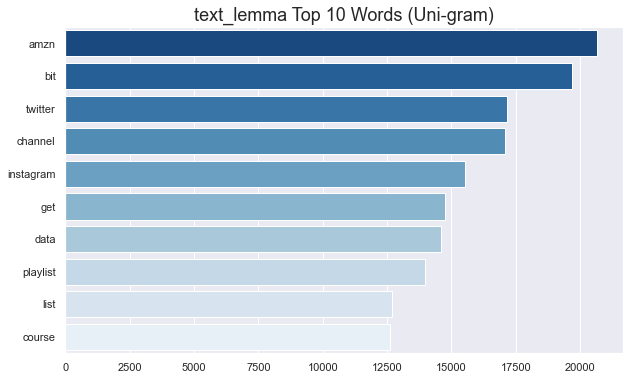

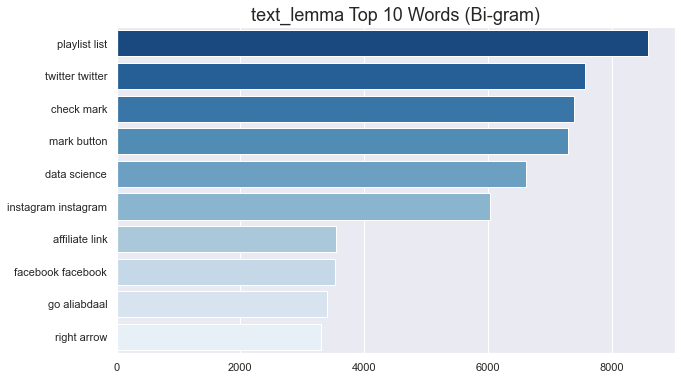

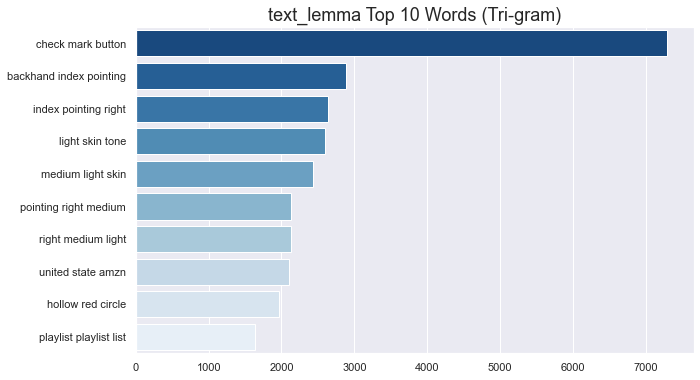

In [135]:
plot_top_tokens(df_tok, 'text_lemma', 10, 1, 'text_lemma Top 10 Words (Uni-gram)', 'Blues_r')
plot_top_tokens(df_tok, 'text_lemma', 10, 2, 'text_lemma Top 10 Words (Bi-gram)', 'Blues_r')
plot_top_tokens(df_tok, 'text_lemma', 10, 3, 'text_lemma Top 10 Words (Tri-gram)', 'Blues_r')

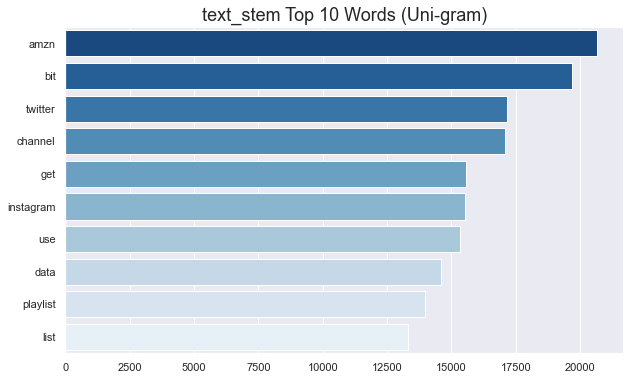

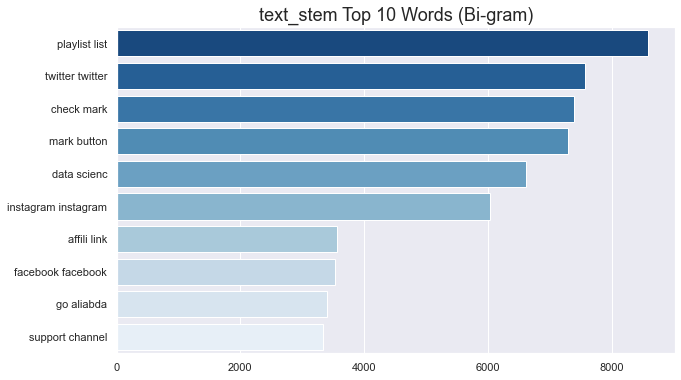

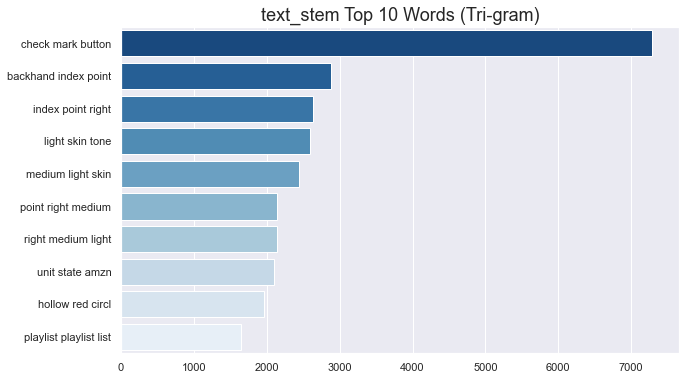

In [136]:
plot_top_tokens(df_tok, 'text_stem', 10, 1, 'text_stem Top 10 Words (Uni-gram)', 'Blues_r')
plot_top_tokens(df_tok, 'text_stem', 10, 2, 'text_stem Top 10 Words (Bi-gram)', 'Blues_r')
plot_top_tokens(df_tok, 'text_stem', 10, 3, 'text_stem Top 10 Words (Tri-gram)', 'Blues_r')

In [137]:
# Lemmatizing on the title column
df_tok['Title_lemma'] = df_tok['Title'].map(lemmatizer_words)
# Stemming on the title column
df_tok['Title_stem'] = df_tok['Title'].map(stemming_words)

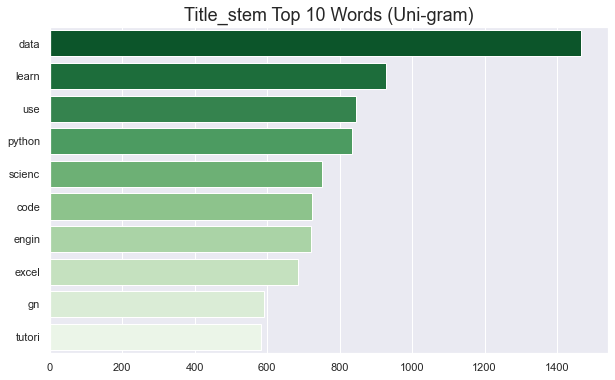

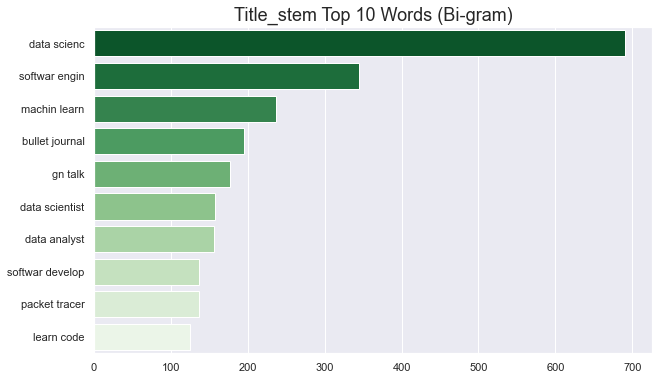

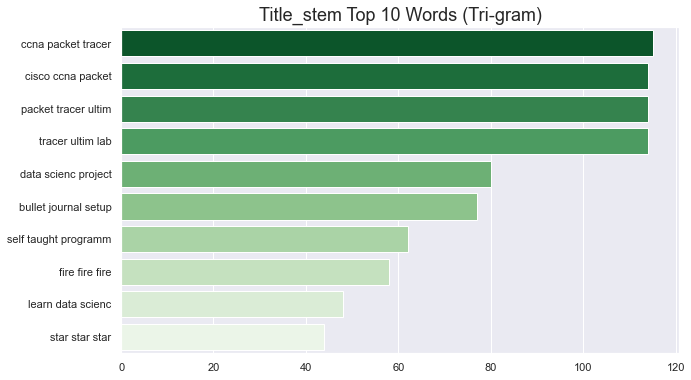

In [138]:
plot_top_tokens(df_tok, 'Title_stem', 10, 1, 'Title_stem Top 10 Words (Uni-gram)', 'Greens_r')
plot_top_tokens(df_tok, 'Title_stem', 10, 2, 'Title_stem Top 10 Words (Bi-gram)', 'Greens_r')
plot_top_tokens(df_tok, 'Title_stem', 10, 3, 'Title_stem Top 10 Words (Tri-gram)', 'Greens_r')

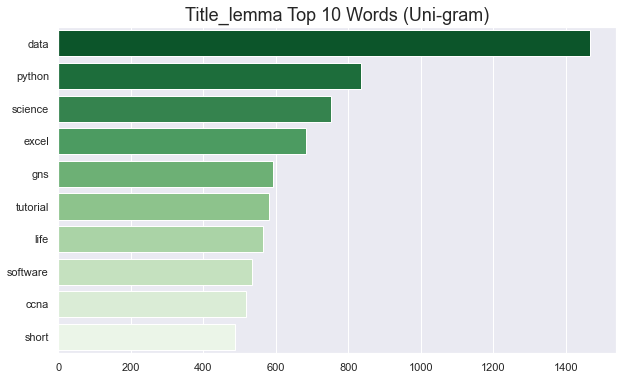

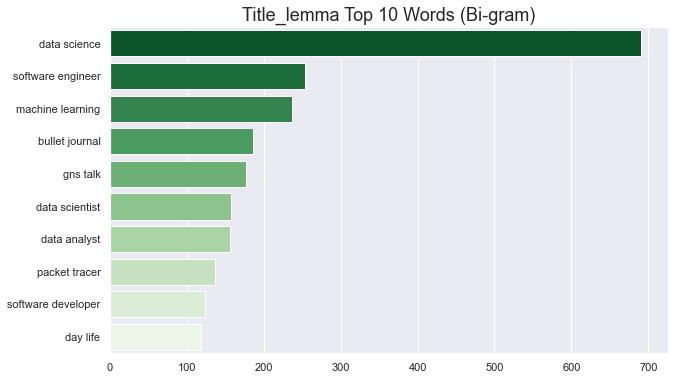

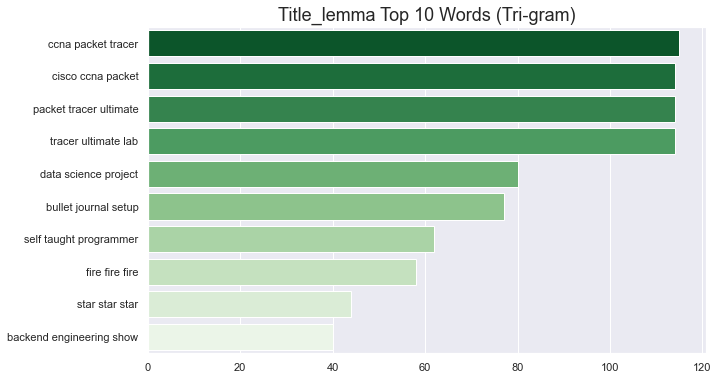

In [139]:
plot_top_tokens(df_tok, 'Title_lemma', 10, 1, 'Title_lemma Top 10 Words (Uni-gram)', 'Greens_r')
plot_top_tokens(df_tok, 'Title_lemma', 10, 2, 'Title_lemma Top 10 Words (Bi-gram)', 'Greens_r')
plot_top_tokens(df_tok, 'Title_lemma', 10, 3, 'Title_lemma Top 10 Words (Tri-gram)', 'Greens_r')

In [140]:
b_stem = len(word_count(df_tok['Title']).split())
a_stem = len(word_count(df_tok['Title_stem']).split())
print(f'The length of corpus for the title reduces from {b_stem} words to {a_stem} words.')
print()
b_lemma = len(word_count(df_tok['Title']).split())
a_lemma = len(word_count(df_tok['Title_lemma']).split())
print(f'The length of corpus for the title reduces from {b_lemma} words to {a_lemma} words.')

The length of corpus for the title reduces from 141815 words to 92150 words.

The length of corpus for the title reduces from 141815 words to 92150 words.


In [141]:
df_tok.to_csv('./output/eda_df_tokenize.csv')

In [142]:
df_tok = pd.read_csv('./output/eda_df_tokenize.csv')

In [143]:
df_tok.columns

Index(['Unnamed: 0', 'Vid_id', 'Title', 'Channel_name', 'text', 'text_cln',
       'Title_cln', 'text_lemma', 'text_stem', 'Title_lemma', 'Title_stem'],
      dtype='object')

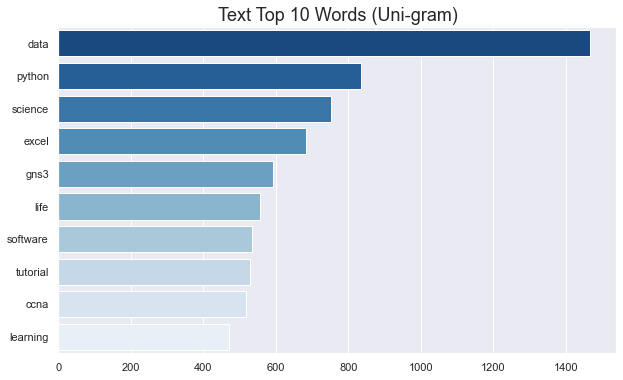

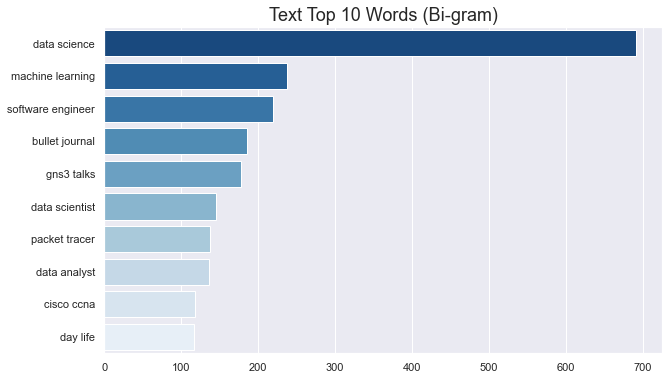

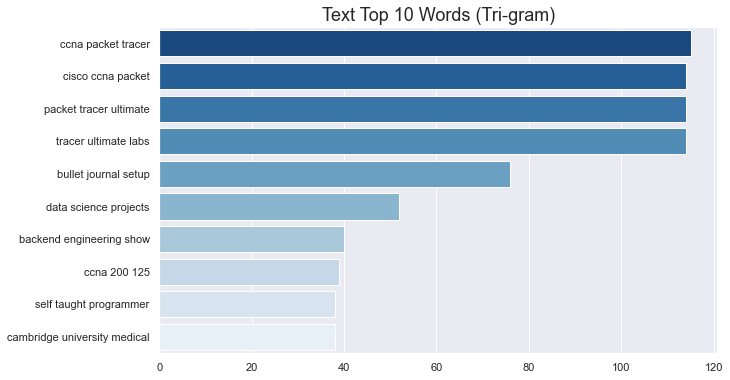

In [144]:
plot_top_tokens(df_tok, 'Title', 10, 1, 'Text Top 10 Words (Uni-gram)', 'Blues_r')
plot_top_tokens(df_tok, 'Title', 10, 2, 'Text Top 10 Words (Bi-gram)', 'Blues_r')
plot_top_tokens(df_tok, 'Title', 10, 3, 'Text Top 10 Words (Tri-gram)', 'Blues_r')

From the bigram, unigram and the trigram plots, the title and the text of the video is congruent with each other. Suggesting that there are no click bait titles and the content of the videos is well reflection of the title of the video.  Bigrams of the text data indicates double words that is right next to each other such as instagram which are the creator social media handles. Hence, the text is not used in the further stages of analysis of the video.  

Stemming and lemmatizing on the Title is not used as there is a missing of interpretation on the words in the title for further topic analysis such as software such as gna3 becomes gn.

## Feature Engineering on Numerical Column on data

In [145]:
# Feature engineering on the date published minus the date scraped and divided by days uploaded
#yt_df = yt_df.drop(columns=['index']) ## When start of re-loading dataset
print(yt_df.shape)
yt_df.info()
yt_df.head(3)

(15718, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15718 entries, 0 to 15717
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   15718 non-null  int64  
 1   Title                   15718 non-null  object 
 2   Published_date          15718 non-null  object 
 3   Description             15549 non-null  object 
 4   View_count              15716 non-null  float64
 5   Like_count              15717 non-null  float64
 6   Vid_id                  15718 non-null  object 
 7   Channel_name            15718 non-null  object 
 8   Time_scrape             15718 non-null  object 
 9   Ch_vid_index            15718 non-null  int64  
 10  Comment_count           15718 non-null  int64  
 11  Title_length            15718 non-null  int64  
 12  Title_word_count        15718 non-null  int64  
 13  Description_length      15549 non-null  float64
 14  Description_word_count  15

,index,Title,Published_date,Description,View_count,Like_count,Vid_id,Channel_name,Time_scrape,Ch_vid_index,Comment_count,Title_length,Title_word_count,Description_length,Description_word_count
0,0,Study with me videos are bad for actual learning,2022-07-21T19:15:46Z,"Start using Deepnote for free: https://deepnote.com/?utm_source=creator&utm_medium=video&utm_campaign=learn&utm_content=tina1\n\nIn this video, I talk about the rise and of study with me's and study with me videos are bad for actual learning \n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttps://365datasc...",16757.0,1113.0,sS09Q-rKjos,Tina Huang,2022-07-23 13:33:22.226680,0,143,48,9,2623.0,312.0
1,1,In Defense of Hustle Culture,2022-07-10T15:00:06Z,"Head to http://brilliant.org/TinaHuang/ to get started for free with Brilliant's interactive lessons. The first 200 people will also get 20% off an annual membership.\n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, ANIME, and generally how to get your sh*t together c: \n\nIn this video, I talk about why I still work hard and hustle despite the whole anti-hustle and antiwork stuff that is all the rage these days. \n\n🔗Affiliates\n========================\nMy SQL for d...",46006.0,2457.0,A3x0gYW42Ts,Tina Huang,2022-07-23 13:33:22.335305,1,321,28,5,2741.0,344.0
2,2,Why the best students are NOT the most successful,2022-06-27T15:00:26Z,"Start building your ideal daily routine! The first 100 people who click on the link will get 25% OFF on Fabulous Premium: http://thefab.co/tinahuang2\n\nIn this video, I talk about why students who get the best grades are not the most successful in life! \n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttp...",77435.0,4551.0,egBzpILuNhA,Tina Huang,2022-07-23 13:33:22.439440,2,379,49,9,2636.0,326.0


In [146]:
# Convert published date and time_scrape into date time
yt_df['Published_date'] = pd.to_datetime(yt_df['Published_date']).dt.tz_localize(None)
yt_df['Time_scrape'] = pd.to_datetime(yt_df['Time_scrape']).dt.tz_localize(None)

# Create a feature days_up 
oneday = pd.Timedelta(days=1) # Convert timedelta into fraction of days
yt_df['days_up'] = (yt_df["Time_scrape"] - yt_df['Published_date'])/oneday

In [147]:
yt_df.head(3)

,index,Title,Published_date,Description,View_count,Like_count,Vid_id,Channel_name,Time_scrape,Ch_vid_index,Comment_count,Title_length,Title_word_count,Description_length,Description_word_count,days_up
0,0,Study with me videos are bad for actual learning,2022-07-21 19:15:46,"Start using Deepnote for free: https://deepnote.com/?utm_source=creator&utm_medium=video&utm_campaign=learn&utm_content=tina1\n\nIn this video, I talk about the rise and of study with me's and study with me videos are bad for actual learning \n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttps://365datasc...",16757.0,1113.0,sS09Q-rKjos,Tina Huang,2022-07-23 13:33:22.226680,0,143,48,9,2623.0,312.0,1.762225
1,1,In Defense of Hustle Culture,2022-07-10 15:00:06,"Head to http://brilliant.org/TinaHuang/ to get started for free with Brilliant's interactive lessons. The first 200 people will also get 20% off an annual membership.\n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, ANIME, and generally how to get your sh*t together c: \n\nIn this video, I talk about why I still work hard and hustle despite the whole anti-hustle and antiwork stuff that is all the rage these days. \n\n🔗Affiliates\n========================\nMy SQL for d...",46006.0,2457.0,A3x0gYW42Ts,Tina Huang,2022-07-23 13:33:22.335305,1,321,28,5,2741.0,344.0,12.939772
2,2,Why the best students are NOT the most successful,2022-06-27 15:00:26,"Start building your ideal daily routine! The first 100 people who click on the link will get 25% OFF on Fabulous Premium: http://thefab.co/tinahuang2\n\nIn this video, I talk about why students who get the best grades are not the most successful in life! \n\n✉️ NEWSLETTER: https://tinahuang.substack.com/ \nIt's about learning, coding, and generally how to get your sh*t together c: \n\n🔗Affiliates\n========================\nMy SQL for data science interviews course (10 full interviews):\nhttp...",77435.0,4551.0,egBzpILuNhA,Tina Huang,2022-07-23 13:33:22.439440,2,379,49,9,2636.0,326.0,25.939542


In [148]:
# View_count per day 
yt_df['View_per_day'] = yt_df['View_count']/yt_df['days_up']
# Like_count per day 
yt_df['Like_per_day'] = yt_df['Like_count']/yt_df['days_up']
# View_count per day 
yt_df['Comment_per_day'] = yt_df['Comment_count']/yt_df['days_up']

In [149]:
yt_df.describe()

,index,View_count,Like_count,Ch_vid_index,Comment_count,Title_length,Title_word_count,Description_length,Description_word_count,days_up,View_per_day,Like_per_day,Comment_per_day
count,15718.000000,1.571600e+04,1.571700e+04,15718.000000,15718.000000,15718.000000,15718.000000,15549.000000,15549.000000,15718.000000,1.571600e+04,15717.000000,15718.000000
mean,2709.384400,2.836670e+05,8.585710e+03,23.654091,554.307418,52.823833,9.023349,1463.392951,184.342852,1057.588781,6.673519e+02,26.677085,1.721154
std,1658.135293,1.626104e+06,3.705737e+04,14.399198,3135.899024,19.725028,3.411843,1085.152636,152.329210,892.574429,1.001545e+04,543.408962,29.810043
min,0.000000,4.700000e+01,0.000000e+00,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.800293,2.014653e-02,0.000000,0.000000
25%,1309.250000,7.445000e+03,2.270000e+02,11.000000,23.000000,38.000000,7.000000,571.000000,70.000000,430.618303,9.129904e+00,0.262139,0.028076
50%,2619.000000,2.820100e+04,9.900000e+02,23.000000,79.000000,51.000000,9.000000,1223.000000,142.000000,801.005963,4.841812e+01,1.665545,0.133122
75%,3929.000000,1.250792e+05,4.178000e+03,36.000000,269.000000,66.000000,11.000000,2075.000000,255.000000,1471.599981,2.383935e+02,8.753520,0.545709
max,6413.000000,8.688138e+07,1.361357e+06,49.000000,213462.000000,100.000000,21.000000,5000.000000,936.000000,5070.939641,1.078984e+06,64295.479000,3003.223209


## Define the target variable 
---
The like ratio and the engagement ratio are feature engineered into the dataframe (yt_df).

In [150]:
# Feature engineer the engagement and like video indicator into the model
yt_df['Engagement_ratio'] = (yt_df['Comment_count']/yt_df['View_count'])*100 
yt_df['Popular_ratio'] = (yt_df['Like_count']/yt_df['View_count'])*100 

In [151]:
# Popular target
yt_df['Popular_target'] = yt_df['Popular_ratio']>=4
yt_df['Popular_target'] = yt_df['Popular_target'].astype(int)

In [152]:
score1 = yt_df['Popular_target'].value_counts(normalize=True)
score1

0    0.626988
1    0.373012
Name: Popular_target, dtype: float64

In [153]:
# Engagement target
yt_df['Engage_target'] = yt_df['Engagement_ratio']>=0.5
yt_df['Engage_target'] = yt_df['Engage_target'].astype(int)

In [154]:
## Model Baseline Score
score = yt_df['Engage_target'].value_counts(normalize=True)
score

0    0.793358
1    0.206642
Name: Engage_target, dtype: float64

From the above two youtube indicators of the popularity of the video and the engagement of the video, the popularity of the video is set as the target variable in the modelling phase. This would help the brand to reach a greater audience. 

The probability of the prediction of a popular video is 0.37 of the dataset. 

## EDA post feature engineering

In [155]:
yt_df.groupby('Channel_name')['Like_count'].value_counts()

Channel_name           Like_count
Aaron Jack / Freemote  660.0         2
                       1314.0        2
                       194.0         1
                       251.0         1
                       322.0         1
                                    ..
studyquill             92249.0       1
                       103323.0      1
                       147817.0      1
                       162434.0      1
                       312769.0      1
Name: Like_count, Length: 13153, dtype: int64

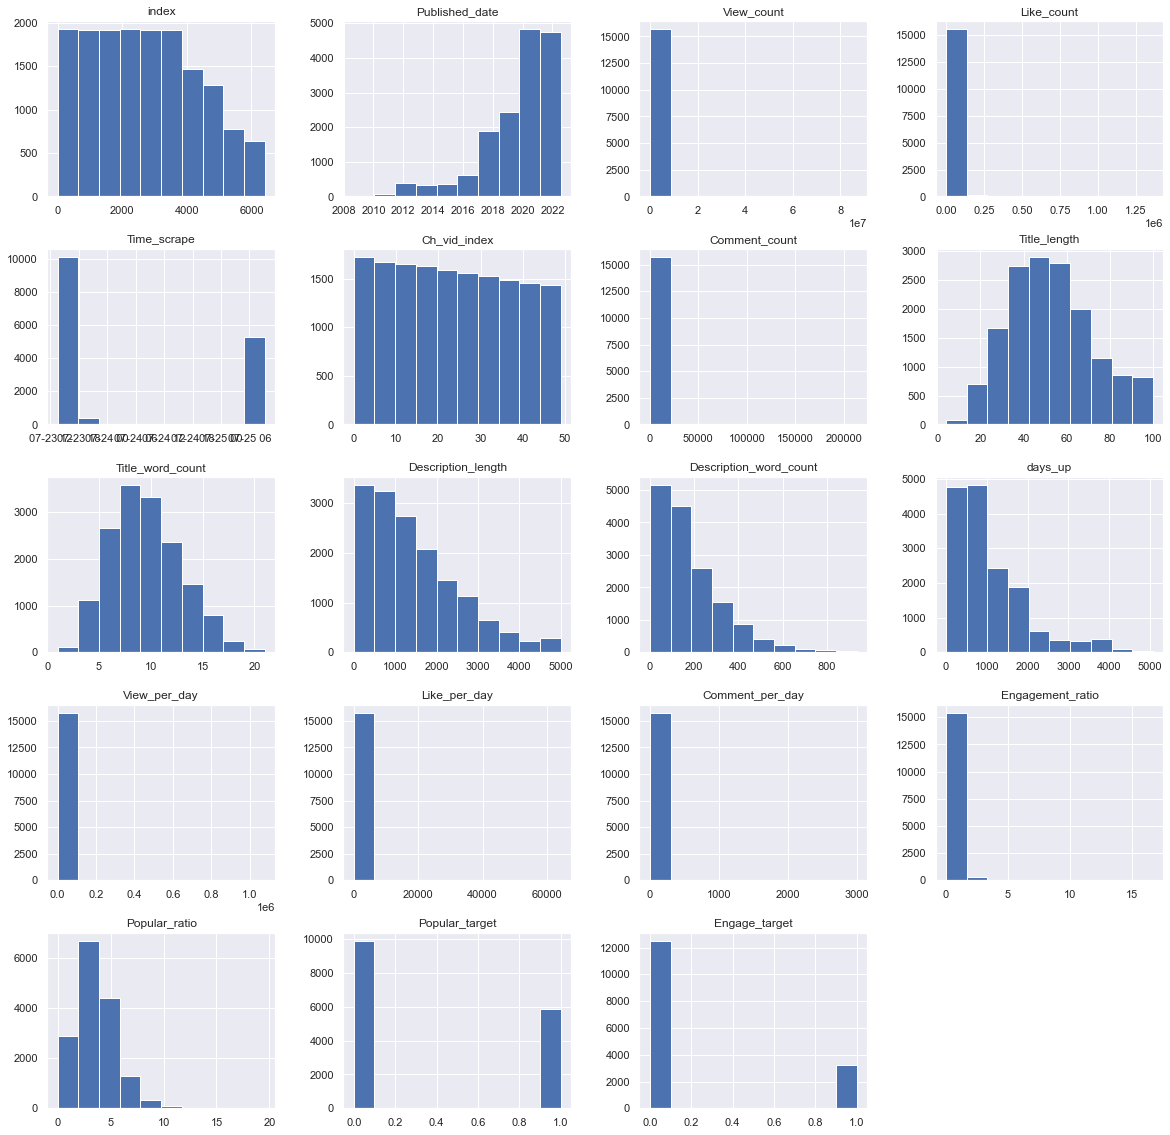

In [156]:
yt_df.hist(figsize=(20, 20));

## Selecting numerical features for the modelling
---

In [157]:
yt_df.columns

Index(['index', 'Title', 'Published_date', 'Description', 'View_count',
       'Like_count', 'Vid_id', 'Channel_name', 'Time_scrape', 'Ch_vid_index',
       'Comment_count', 'Title_length', 'Title_word_count',
       'Description_length', 'Description_word_count', 'days_up',
       'View_per_day', 'Like_per_day', 'Comment_per_day', 'Engagement_ratio',
       'Popular_ratio', 'Popular_target', 'Engage_target'],
      dtype='object')

In [158]:
ch_gr = ch_df.filter(['Channel_name', 'Growth'])
df = yt_df.filter(['Title', 'Channel_name', 'Vid_id', 'View_count', 'Like_count', 'Comment_count', 'View_per_day', 'Like_per_day', 'Comment_per_day', 'Engagement_ratio','Popular_ratio','Popular_target'])

In [159]:
### Merge both dataframe
df_m = pd.merge(df,ch_gr, on='Channel_name', how='outer')

In [161]:
print(df_m.shape)
df_m.head()

(15718, 13)


,Title,Channel_name,Vid_id,View_count,Like_count,Comment_count,View_per_day,Like_per_day,Comment_per_day,Engagement_ratio,Popular_ratio,Popular_target,Growth
0,Study with me videos are bad for actual learning,Tina Huang,sS09Q-rKjos,16757.0,1113.0,143,9509.002236,631.587963,81.147420,0.853375,6.642000,1,36.992072
1,In Defense of Hustle Culture,Tina Huang,A3x0gYW42Ts,46006.0,2457.0,321,3555.394838,189.879692,24.807237,0.697735,5.340608,1,36.992072
2,Why the best students are NOT the most successful,Tina Huang,egBzpILuNhA,77435.0,4551.0,379,2985.210750,175.446428,14.610898,0.489443,5.877187,1,36.992072
3,How to Make a Self Study Plan (that you don't give up halfway),Tina Huang,SQNzij5m_Yg,44254.0,2683.0,196,1306.302100,79.197554,5.785583,0.442898,6.062729,1,36.992072
4,I left Meta...and I'm lowkey freaking out 🥲,Tina Huang,8tpha6FIa_k,207709.0,11628.0,799,4726.001495,264.571807,18.179642,0.384673,5.598217,1,36.992072


In [162]:
df_m.to_csv('./output/df_m.csv')

The following 9 numerical columns are retained for the modelling stage while the categorical column, Title is further scrutized in the following codebooks with various topic modelling/ clustering methods.